## Ashish Shukla cs.ashishshukla@gmail.com

In [1]:
# Importing libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import xml.etree.ElementTree as et
import os
import csv
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from datetime import datetime

In [2]:
# specifying the fields for csv file 
fields = ['Id', 'Text', 'Topic', 'Title', 'Tags']
def parseXML(xmlfile, start_count): 
    #create element tree object 
    print("File", xmlfile)
    tree = et.parse(xmlfile) 
    topic = xmlfile.split("/")[1].split("_")[0]
    # get root element 
    root = tree.getroot() 
    # create empty list for news items 
    newsitems = [] 
    count = start_count
    # iterate news items 
    for each_row in root.iter("row"):
        news = {}
        news["Id"] = count
        news["Text"] = each_row.attrib["Body"]
        news["Topic"] = topic
        try:
            news["Title"] = each_row.attrib["Title"]
        except:
            news["Title"] = None
        try:
            news["Tags"] = each_row.attrib["Tags"]
        except:
            news["Tags"] = None
        count=count+1
        newsitems.append(news)
    # return news items list 
    print("len", len(newsitems))
    return newsitems

In [3]:
def savetoCSV(newsitems, filename): 
    # writing to csv file 
    with open(filename, 'x', encoding='utf-8') as csvfile: 
        # creating a csv dict writer object 
        writer = csv.DictWriter(csvfile, fieldnames = fields) 
        # writing headers (field names) 
        writer.writeheader() 
        # writing data rows 
        writer.writerows(newsitems)

In [5]:
# specifying the fields for csv file 
fields = ['Id', 'Text', 'Topic', 'Title', 'Tags']
postfiles = os.listdir("allpostxml")
start_count = 0
for each_file in postfiles:
    print(each_file)
    # parse xml file 
    newsitems = parseXML("allpostxml/"+each_file, start_count) 
    csv_filename = each_file.split('.')[0] + ".csv"
    print("csv_filename", csv_filename)
    # store news items in a csv file 
    savetoCSV(newsitems, "CSVFiles/" + csv_filename)
    start_count = len(newsitems) + start_count

ai_posts.xml
File allpostxml/ai_posts.xml
len 12546
csv_filename ai_posts.csv
ai_posts_meta.xml
File allpostxml/ai_posts_meta.xml
len 608
csv_filename ai_posts_meta.csv
cs_Posts.xml
File allpostxml/cs_Posts.xml
len 73252
csv_filename cs_Posts.csv
cs_Posts_meta.xml
File allpostxml/cs_Posts_meta.xml
len 1537
csv_filename cs_Posts_meta.csv
ds_Posts.xml
File allpostxml/ds_Posts.xml
len 43650
csv_filename ds_Posts.csv
ds_Posts_meta.xml
File allpostxml/ds_Posts_meta.xml
len 466
csv_filename ds_Posts_meta.csv


In [250]:
data = pd.read_csv('CSVFiles/ai_posts.csv')
data.head()

,Id,Text,Topic,Title,Tags
0,0,"<p>What does ""backprop"" mean? Is the ""backprop...",ai,"What is ""backprop""?",<neural-networks><backpropagation><terminology...
1,1,<p>Does increasing the noise in data help to i...,ai,How does noise affect generalization?,<neural-networks><machine-learning><statistica...
2,2,"<p>""Backprop"" is the same as ""backpropagation""...",ai,NaN,NaN
3,3,"<p>When you're writing your algorithm, how do ...",ai,How to find the optimal number of neurons per ...,<deep-network><search><neurons>
4,4,<p>I have a LEGO Mindstorms EV3 and I'm wonder...,ai,How to program AI in Mindstorms,<python><mindstorms>


In [251]:
# Watching some samples of text
for i in range(5):
    print(data.iloc[i]['Text'])

<p>What does "backprop" mean? Is the "backprop" term basically the same as "backpropagation" or does it have a different meaning?</p>

<p>Does increasing the noise in data help to improve the learning ability of a network? Does it make any difference or does it depend on the problem being solved? How is it affect the generalization process overall?</p>

<p>"Backprop" is the same as "backpropagation": it's just a shorter way to say it. It is sometimes abbreviated as "BP".</p>

<p>When you're writing your algorithm, how do you know how many neurons you need per single layer? Are there any methods for finding the optimal number of them, or is it a rule of thumb?</p>

<p>I have a LEGO Mindstorms EV3 and I'm wondering if there's any way I could start coding the bot in Python rather than the default drag-and-drop system. Is a Mindstorm considered AI?</p>

<p>Is this possible?</p>

<hr>

<p>My goal is to write a basic walking program in Python. The bot is the EV3RSTORM. I searched and found <

In [9]:
mdata = pd.read_csv('CSVFiles/ai_posts_meta.csv')
mdata.head()

,Id,Text,Topic,Title,Tags
0,12546,"<p>Besides being ""one of the 7 meta questions ...",ai,How do we promote this site?,<discussion>
1,12547,"<p>I've clicked on <em>chat</em> link, but the...",ai,Is there any chat room?,<support><chat>
2,12548,<p>I think this will be a crucial thing to fig...,ai,"How broadly should we define ""on topic""?",<discussion>
3,12549,<p>Are all questions asked on stats and data s...,ai,Are all questions asked on stats and data scie...,<discussion><scope>
4,12550,<p>I've seen several questions that use the <a...,ai,Why isn't the [artificial-intelligence] tag bl...,<bug><feature-request><tags>


In [10]:
for i in range(5):
    print(mdata.iloc[i]['Text'])

<p>Besides being "one of the 7 meta questions every site should ask", it's just plain important. An "AI Stackexchange" site has been tried before, at least once, and possibly a few times.   And in the past, it's been killed for lack of activity.  :-(</p>

<p>So... how so we promote this site well enough to attract a critical mass of participants? And how do we get people participating?  </p>

<p>I've clicked on <em>chat</em> link, but the list is empty. Also I've tried to create one, but I couldn't, as it's saying:</p>

<blockquote>
  <p>This room might already exist.</p>
</blockquote>

<p>But it's not there yet.</p>

<p>I think this will be a crucial thing to figure out.  On the one hand, I think it's important to be as inclusive as possible, and avoid being overly pedantic and stay away from the extreme degree of elitism that infects many stackexchange sites.  BUT.. on the other hand, we want the site to be of interest to everyone from hobbyists to serious academic researchers.   </p

In [13]:
# Combine all the above dataframes
fields = ['Id', 'Text', 'Topic', 'Title', 'Tags']
all_dataframes = pd.DataFrame(columns=fields)
csvpostfiles = os.listdir("CSVFiles/")

for each_file in csvpostfiles:
    print("each file", each_file)
    df = pd.read_csv("CSVFiles/"+ each_file)
    print("shape", df.shape)
    all_dataframes = all_dataframes.append(df, ignore_index=True)
print("The shape of all dataframes combined is: ", all_dataframes.shape)
all_dataframes.head()

each file ai_posts.csv
shape (12546, 5)
each file ai_posts_meta.csv
shape (608, 5)
each file cs_Posts.csv
shape (73252, 5)
each file cs_Posts_meta.csv
shape (1537, 5)
each file ds_Posts.csv
shape (43650, 5)
each file ds_Posts_meta.csv
shape (466, 5)
The shape of all dataframes combined is:  (132059, 5)


,Id,Text,Topic,Title,Tags
0,0,"<p>What does ""backprop"" mean? Is the ""backprop...",ai,"What is ""backprop""?",<neural-networks><backpropagation><terminology...
1,1,<p>Does increasing the noise in data help to i...,ai,How does noise affect generalization?,<neural-networks><machine-learning><statistica...
2,2,"<p>""Backprop"" is the same as ""backpropagation""...",ai,NaN,NaN
3,3,"<p>When you're writing your algorithm, how do ...",ai,How to find the optimal number of neurons per ...,<deep-network><search><neurons>
4,4,<p>I have a LEGO Mindstorms EV3 and I'm wonder...,ai,How to program AI in Mindstorms,<python><mindstorms>


In [14]:
# Number of Questions with diffrent Topics
all_dataframes['Topic'].value_counts()

cs    74789
ds    44116
ai    13154
Name: Topic, dtype: int64

In [15]:
# Number of rows with Null values for diffrent coloumns
all_dataframes.isnull().sum()

Id           0
Text       594
Topic        0
Title    72143
Tags     72143
dtype: int64

In [16]:
# Percentage of rows which contain null values for title or tags
(all_dataframes.isnull().sum()["Title"]/all_dataframes.shape[0])*100

54.62937020574137

In [17]:
# Drop the title and tags coloum
all_dataframes_without_null = all_dataframes.dropna()
print(all_dataframes_without_null.shape)
all_dataframes_without_null.head()

(59916, 5)


,Id,Text,Topic,Title,Tags
0,0,"<p>What does ""backprop"" mean? Is the ""backprop...",ai,"What is ""backprop""?",<neural-networks><backpropagation><terminology...
1,1,<p>Does increasing the noise in data help to i...,ai,How does noise affect generalization?,<neural-networks><machine-learning><statistica...
3,3,"<p>When you're writing your algorithm, how do ...",ai,How to find the optimal number of neurons per ...,<deep-network><search><neurons>
4,4,<p>I have a LEGO Mindstorms EV3 and I'm wonder...,ai,How to program AI in Mindstorms,<python><mindstorms>
5,5,<p>Given the following definition of an intell...,ai,Are humans intelligent according to the defini...,<philosophy><definitions><intelligent-agent>


In [ ]:
# Save the above dataframe into the csv file
all_dataframes_without_null.to_csv('all_dataframe_without_preprocess_small.csv', index=False)

In [104]:
all_dataframe_without_preprocess_df_copy = pd.read_csv('all_dataframe_without_preprocess_small.csv')

# Remove the ID, Topic, and Tags since these are not important to search problem
all_dataframe_without_preprocess_df_copy.drop(['Id', 'Topic', 'Tags'], axis=1, inplace=True)
all_dataframe_without_preprocess_df_copy.head()

,Text,Title
0,"<p>What does ""backprop"" mean? Is the ""backprop...","What is ""backprop""?"
1,<p>Does increasing the noise in data help to i...,How does noise affect generalization?
2,"<p>When you're writing your algorithm, how do ...",How to find the optimal number of neurons per ...
3,<p>I have a LEGO Mindstorms EV3 and I'm wonder...,How to program AI in Mindstorms
4,<p>Given the following definition of an intell...,Are humans intelligent according to the defini...


In [125]:
all_dataframe_without_preprocess_df_copy.shape

(59916, 2)

<h2> Adding more StackOverflow data into the previous dataframe </h2> 

In [126]:
more_stackoverflow_data = pd.read_csv('stackoverflow_data.csv')
print(more_stackoverflow_data.shape)
more_stackoverflow_data.head()

(826813, 2)


,Title,Text
0,btnAdd click event opens two window after r...,<p>i m opening window(search.aspx)using below ...
1,java.lang.NoSuchMethodError: javax.servlet.S...,<p>i want to have a servlet to process inputs ...
2,"""Specified initialization vector (IV) does no...",<p>I've had troubles using an CryptoStream for...
3,"""subquery returns more than 1 row"" error.",<p>I am new to web programming and I'm trying ...
4,"'fi' or 'fl' result in big ""S""-like symbol","<p>I use LyX with XeTeX, and the output font i..."


#### Merging both dataframes

In [127]:
more_stackoverflow_data.shape, all_dataframe_without_preprocess_df_copy.shape

((826813, 2), (59916, 2))

In [128]:
# Merge both above dataframes
combined_new_df = pd.concat([more_stackoverflow_data, all_dataframe_without_preprocess_df_copy])
print(combined_new_df.shape)
combined_new_df.head()

(886729, 2)


,Text,Title
0,<p>i m opening window(search.aspx)using below ...,btnAdd click event opens two window after r...
1,<p>i want to have a servlet to process inputs ...,java.lang.NoSuchMethodError: javax.servlet.S...
2,<p>I've had troubles using an CryptoStream for...,"""Specified initialization vector (IV) does no..."
3,<p>I am new to web programming and I'm trying ...,"""subquery returns more than 1 row"" error."
4,"<p>I use LyX with XeTeX, and the output font i...","'fi' or 'fl' result in big ""S""-like symbol"


In [129]:
# Drop Duplicates
print(combined_new_df.duplicated().sum())
combined_new_df.drop_duplicates(inplace=True)
print(combined_new_df.duplicated().sum())

49
0


In [130]:
# Save above dataframe into csv file
combined_new_df.to_csv('all_dataframe_without_preprocess.csv', index=False)

## Data preprocessing

### Text

In [3]:
all_dataframes_without_null = pd.read_csv('all_dataframe_without_preprocess.csv')
all_dataframes_without_null.head()

,Text,Title
0,<p>i m opening window(search.aspx)using below ...,btnAdd click event opens two window after r...
1,<p>i want to have a servlet to process inputs ...,java.lang.NoSuchMethodError: javax.servlet.S...
2,<p>I've had troubles using an CryptoStream for...,"""Specified initialization vector (IV) does no..."
3,<p>I am new to web programming and I'm trying ...,"""subquery returns more than 1 row"" error."
4,"<p>I use LyX with XeTeX, and the output font i...","'fi' or 'fl' result in big ""S""-like symbol"


In [5]:
for i in range(10):
    try:
        print(all_dataframes_without_null['Text'][i])
    except:
        pass

<p>i m opening window(search.aspx)using below code.
 i hav add button in search.aspx 
when i insert record from btnAdd click event then it opens another window. 
after inserting record i have to close that window. How can i do that.</p>

<pre><code>       //calling Search.aspx on button click of abc.aspx
      if (window.showModalDialog) {
        window.showModalDialog("Search.aspx","name",
        "dialogWidth:255px;dialogHeight:250px");
        }
        //Search.aspx code behind
        protected void btnAdd_Click(object sender, EventArgs e)
        {

          //Insert query for adding record
        }

//Search.aspx code
$(document).ready(function ()
        {
            $("input[id$='btnAdd']").live('click', function (e)
            {
                if ($(".csstablelisttdselected").length == 0)
                {
                    alert("Select patient to fixed appointment.");
                    return false;
                }
                else
                {
        

In [6]:
import re  # For using regular expression
def strip_html(data):
    cleanr = re.compile('<.*?>')
    cleancode = re.compile('<code>.*?</code>')
    
    clean_text = re.sub(cleanr, ' ', data)
    clean_text = re.sub(cleancode, ' ', clean_text)
    clean_text = re.sub(r'[^A-Za-z]+',' ',clean_text)
    clean_text = clean_text.lower()
    return clean_text
stop_words = set(stopwords.words('english'))
#stemmer = SnowballStemmer('english')
stemmer = WordNetLemmatizer() 

In [7]:
def preprocess_text(document_list):
    preprocessed_document_list = []
    for document in document_list:
        striped_html_text = strip_html(document)
        words = word_tokenize(str(striped_html_text.lower()))
        
        #Removing all single letter and and stopwords from question exceptt for the letter 'c'
        cleaned_document = ' '.join(str(stemmer.lemmatize(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
        preprocessed_document_list.append(cleaned_document)
    return preprocessed_document_list

In [8]:
clean_list = preprocess_text(all_dataframes_without_null['Text'].values)

In [142]:
#import nltk
#nltk.download('punkt')
#nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashish.shukla2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
for textone in range(10):
    print(textone, "*******", clean_list[textone])
    print("*"*30)

0 ******* opening window search aspx using code hav add button search aspx insert record btnadd click event open another window inserting record close window calling search aspx button click abc aspx window showmodaldialog window showmodaldialog search aspx name dialogwidth px dialogheight px search aspx code behind protected void btnadd click object sender eventargs insert query adding record search aspx code document ready function input id btnadd live click function csstablelisttdselected length alert select patient fixed appointment return false else hidpid value table td csstablelisttdselected first text lt asp button id btnadd width px cssclass cssbutton runat server text add onclick btnadd click gt
******************************
1 ******* want servlet process input standalone java program deploy servlet jboss put servlet class file web inf class web xml gave servlet url mapping java client program opened connected servlet using url object using localhost getting folowing error e

In [12]:
all_dataframes_without_null['preprocessed_text'] = clean_list

In [13]:
all_dataframes_without_null.head()

,Text,Title,preprocessed_text
0,<p>i m opening window(search.aspx)using below ...,btnAdd click event opens two window after r...,opening window search aspx using code hav add ...
1,<p>i want to have a servlet to process inputs ...,java.lang.NoSuchMethodError: javax.servlet.S...,want servlet process input standalone java pro...
2,<p>I've had troubles using an CryptoStream for...,"""Specified initialization vector (IV) does no...",trouble using cryptostream file encryption cod...
3,<p>I am new to web programming and I'm trying ...,"""subquery returns more than 1 row"" error.",new web programming trying make twitter clone ...
4,"<p>I use LyX with XeTeX, and the output font i...","'fi' or 'fl' result in big ""S""-like symbol",use lyx xetex output font dejavu sans write in...


### Preprocessing of Title text

In [14]:
cleaned_titles = preprocess_text(all_dataframes_without_null['Title'].values)
all_dataframes_without_null['preprocessed_titles'] = cleaned_titles

In [15]:
# Drop the unprocessed data from this dataframe
all_dataframes_without_null.drop(['Text', 'Title'], axis=1, inplace=True)
all_dataframes_without_null.head()

,preprocessed_text,preprocessed_titles
0,opening window search aspx using code hav add ...,btnadd click event open two window record added
1,want servlet process input standalone java pro...,java lang nosuchmethoderror javax servlet serv...
2,trouble using cryptostream file encryption cod...,specified initialization vector iv match block...
3,new web programming trying make twitter clone ...,subquery return row error
4,use lyx xetex output font dejavu sans write in...,fi fl result big like symbol


In [16]:
# Save preprocessed dataframe to a csv file
all_dataframes_without_null.to_csv('final_df.csv', index=False)

### Preprocessing of Tags

In [57]:
# def clean_tags(tags_list):
#     processed_tags = []
#     for tags in tags_list:
#         tags = tags.replace("><", " ")
#         tags = tags.replace("<", "")
#         tags = tags.replace(">", "")
#         tags = tags.replace("-", "_")
#         processed_tags.append(tags)
#     return processed_tags

In [61]:
# cleaned_tags = clean_tags(all_dataframes_without_null['Tags'].values)
# all_dataframes_without_null['processed_tags'] =  cleaned_tags

In [65]:
# Drop already processed columns from the dataframe
# all_dataframes_without_null.drop(['Text', 'Title', 'Tags'], axis=1, inplace=True)

In [68]:
# all_dataframes_without_null.head()

,Id,Topic,preprocessed_text,preprocessed_titles,processed_tags
0,0,ai,backprop mean backprop term basically backprop...,backprop,neural_networks backpropagation terminology de...
1,1,ai,increasing noise data help improve learning ab...,noise affect generalization,neural_networks machine_learning statistical_a...
3,3,ai,writing algorithm know many neuron need per si...,find optimal number neuron per layer,deep_network search neurons
4,4,ai,lego mindstorms ev wondering way could start c...,program ai mindstorms,python mindstorms
5,5,ai,given following definition intelligent agent t...,human intelligent according definition intelli...,philosophy definitions intelligent_agent


In [70]:
#Save preprocessed dataframe to a csv file
# all_dataframes_without_null.to_csv('final_df.csv', index=False)

### Featurization of text features

In [20]:
finaldf = pd.read_csv('final_df.csv')
finaldf.head()

,preprocessed_text,preprocessed_titles
0,opening window search aspx using code hav add ...,btnadd click event open two window record added
1,want servlet process input standalone java pro...,java lang nosuchmethoderror javax servlet serv...
2,trouble using cryptostream file encryption cod...,specified initialization vector iv match block...
3,new web programming trying make twitter clone ...,subquery return row error
4,use lyx xetex output font dejavu sans write in...,fi fl result big like symbol


In [21]:
finaldf['preprocessed_titles_text'] = finaldf['preprocessed_titles'] + " " + finaldf['preprocessed_text']
finaldf.head()

,preprocessed_text,preprocessed_titles,preprocessed_titles_text
0,opening window search aspx using code hav add ...,btnadd click event open two window record added,btnadd click event open two window record adde...
1,want servlet process input standalone java pro...,java lang nosuchmethoderror javax servlet serv...,java lang nosuchmethoderror javax servlet serv...
2,trouble using cryptostream file encryption cod...,specified initialization vector iv match block...,specified initialization vector iv match block...
3,new web programming trying make twitter clone ...,subquery return row error,subquery return row error new web programming ...
4,use lyx xetex output font dejavu sans write in...,fi fl result big like symbol,fi fl result big like symbol use lyx xetex out...


In [22]:
# Prepare data for the traing of word2vec model
sentence_corpus = []
for sen in finaldf['preprocessed_titles_text'].values:
    sentence_corpus.append(str(sen).split())


# Train Word2Vec model for preprocessed_text and preprocessed_titles
from gensim.models import word2vec, KeyedVectors
from gensim.test.utils import get_tmpfile

# Initialize the model file
path = get_tmpfile("word2vec.model")

# Training the word2vec model
model = word2vec.Word2Vec(sentence_corpus, workers=8, size=400, min_count=5, window = 10)
model.save("word2vec.model")

In [23]:
# Convert preprocessed text and preprocessed titles into avgw2v and concatnate
# Average word2vec for the text

# Loading the already trained word2vec model
from gensim.models import word2vec, KeyedVectors
from gensim.test.utils import get_tmpfile
import pickle
model = word2vec.Word2Vec.load("word2vec.model")

def average_w2v(sentence):
    sentence = str(sentence)
    vector = np.zeros(300)
    number_of_words_in_sentence = 0
    for word in sentence.split():
        try:
            vector = vector + model[word]
        except:
            vector = vector + np.zeros(300)
        number_of_words_in_sentence += 1
    final_vector = vector/number_of_words_in_sentence
    return final_vector

In [24]:
# Convert all text into average word2vec
word2vec_text = []
for one_doc in finaldf['preprocessed_text'].values:
    word2vec_text.append(average_w2v(one_doc))
    
# Convert all text into average word2vec
word2vec_titles = []
for one_doc in finaldf['preprocessed_titles'].values:
    word2vec_titles.append(average_w2v(one_doc))

# Combine above both word2vec features
word2vec_title_text = []
for i in range(len(word2vec_text)):
    word2vec_title_text.append(np.concatenate([word2vec_text[i], word2vec_titles[i]]))

In [26]:
word2vec_title_text[0].shape

(600,)

<h1> Analysis of tags </h1>

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(finaldf['processed_tags'].values)

In [74]:
all_tags_list = vectorizer.get_feature_names()

In [155]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(tokenizer = lambda x: x.split(), max_features=5000)
title_bow = vect.fit_transform(finaldf['preprocessed_titles'].values.astype("U"))

In [136]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, multilabel_y, test_size=0.20, random_state=42)
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

<59916x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 2664432 stored elements in Compressed Sparse Row format>

In [171]:
# Train the svm model using above data of title, body as X and tags as y using one vs rest classifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
X = title_bow.copy()
multilabel_y = multilabel_y
tags_clf = OneVsRestClassifier(SGDClassifier(loss='hinge', n_jobs=-1, verbose=0))
tags_clf.fit(X, multilabel_y)

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=1000,
                                            n_iter_no_change=5, n_jobs=-1,
                                            penalty='l2', power_t=0.5,
                                            random_state=None, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0, warm_start=False),
                    n_jobs=None)

In [172]:
from joblib import dump, load
dump(tags_clf, 'tags_clf_saved.joblib')
# tags_clf = load('tags_clf_saved.joblib')

['tags_clf_saved.joblib']

In [173]:
tags_clf = load('tags_clf_saved.joblib')

In [175]:
test_point_index = 45
result = tags_clf.predict(title_bow[test_point_index].reshape(1, -1)).toarray()
i, = np.where(result[0] == 1) # Getting all the index for which our model pridicted a tag
all_tags_list_array = np.array(all_tags_list)
print("Predicted tags: ", all_tags_list_array[i])
print("Actual tags:", finaldf['processed_tags'].values[test_point_index])

Predicted tags:  ['optimization']
Actual tags: optimization agi


In [177]:
for i in range(50, 100):
    test_point_index = i
    result = tags_clf.predict(title_bow[test_point_index].reshape(1, -1)).toarray()
    i, = np.where(result[0] == 1) # Getting all the index for which our model pridicted a tag
    all_tags_list_array = np.array(all_tags_list)
    print("Predicted tags: ", all_tags_list_array[i])
    print("Actual tags:", finaldf['processed_tags'].values[test_point_index])

Predicted tags:  []
Actual tags: neural_networks machine_learning deep_network comparison hidden_layers
Predicted tags:  ['fuzzy_logic']
Actual tags: fuzzy_logic
Predicted tags:  []
Actual tags: philosophy incompleteness_theorems
Predicted tags:  ['philosophy']
Actual tags: philosophy chinese_room_argument
Predicted tags:  ['deep_learning']
Actual tags: boltzmann_machine
Predicted tags:  ['cellular_automata']
Actual tags: evolutionary_algorithms topology efficiency
Predicted tags:  []
Actual tags: philosophy superintelligence
Predicted tags:  []
Actual tags: models agi aixi
Predicted tags:  []
Actual tags: neural_networks symbolic_ai symbolic_computing
Predicted tags:  ['hypercomputation']
Actual tags: neural_networks hypercomputation recurrent_neural_networks
Predicted tags:  ['halting_problem']
Actual tags: halting_problem
Predicted tags:  []
Actual tags: convolutional_neural_networks deepdream
Predicted tags:  ['deep_learning']
Actual tags: performance neural_doodle deepdreaming
Pre

<h3> We tried the approach of first detecting the tags in query question and then calculating the cosine distance to only all those stored questions which also have these tags. Since most of the time model does not predict the correct tags or if the wrong tag is predicted by the model then our further recommended results get affected. So we tried the keyword-based method which is also used by google search .</h3>

<h1> Case 1 : Average Word2Vec, Cosine Similarity, Keywords </h1>

### Keywords models for reducing time to search
# https://www.google.com/search/howsearchworks/

In [3]:
finaldf = pd.read_csv('final_df.csv')
finaldf.head()

,preprocessed_text,preprocessed_titles
0,opening window search aspx using code hav add ...,btnadd click event open two window record added
1,want servlet process input standalone java pro...,java lang nosuchmethoderror javax servlet serv...
2,trouble using cryptostream file encryption cod...,specified initialization vector iv match block...
3,new web programming trying make twitter clone ...,subquery return row error
4,use lyx xetex output font dejavu sans write in...,fi fl result big like symbol


In [4]:
finaldf['preprocessed_titles_text'] = finaldf['preprocessed_titles'] + " " + finaldf['preprocessed_text']
finaldf.head()

,preprocessed_text,preprocessed_titles,preprocessed_titles_text
0,opening window search aspx using code hav add ...,btnadd click event open two window record added,btnadd click event open two window record adde...
1,want servlet process input standalone java pro...,java lang nosuchmethoderror javax servlet serv...,java lang nosuchmethoderror javax servlet serv...
2,trouble using cryptostream file encryption cod...,specified initialization vector iv match block...,specified initialization vector iv match block...
3,new web programming trying make twitter clone ...,subquery return row error,subquery return row error new web programming ...
4,use lyx xetex output font dejavu sans write in...,fi fl result big like symbol,fi fl result big like symbol use lyx xetex out...


In [5]:
# Getting all the keywords
titles_text_array = finaldf['preprocessed_titles_text'].values
keyword_index_dict = dict()
index = 0
for title_text in titles_text_array:
    titles_text_word_list = str(title_text).split()
    for keyword in titles_text_word_list:
        try:
            keyword_index_dict[keyword].append(index)
        except:
            keyword_index_dict[keyword] = []
            keyword_index_dict[keyword].append(index)
    index += 1

In [105]:
print("Total Number of keywords stored in the dictionary is: ",len(keyword_index_dict.keys()))

Total Number of keywords stored in the dictionary is:  1664772


In [7]:
count = 0
for val in keyword_index_dict.keys():
    print(val)
    count = count + 1
    if count == 50:
        break
    else:
        pass

btnadd
click
event
open
two
window
record
added
opening
search
aspx
using
code
hav
add
button
insert
another
inserting
close
calling
abc
showmodaldialog
name
dialogwidth
px
dialogheight
behind
protected
void
object
sender
eventargs
query
adding
document
ready
function
input
id
live
csstablelisttdselected
length
alert
select
patient
fixed
appointment
return
false


In [95]:
# Let test some data points using cosine similarity Id =14, index=8
# https://stackoverflow.com/questions/37454785/how-to-handle-negative-values-of-cosine-similarities
# https://stackoverflow.com/questions/34226400/find-the-index-of-the-k-smallest-values-of-a-numpy-array

from sklearn.metrics.pairwise import cosine_similarity

def index_top_k_similar(all_arrays, test_arrays, k):
    """
    Here all arrays shape should be (n, d) and
    test array shape should be (1, d)
    """
    # all_cosine_similarity = cosine_similarity(all_arrays, test_array.reshape(1, -1))
    all_cosine_similarity = cosine_similarity(all_arrays, test_arrays)
    all_cosine_distances = (1 - all_cosine_similarity).reshape(1, -1)[0]
    
    # Since we have to select only k minimum distances so there is no need to short the entire array
    index_of_least_distances = np.argpartition(all_cosine_distances, k)[:k]
    selected_k_cosine_distances =  all_cosine_distances[index_of_least_distances]
    
    index_of_least_distances_sorted = np.argsort(selected_k_cosine_distances) # 0 to 9 range
    final_index_of_least_distances_sorted = index_of_least_distances[index_of_least_distances_sorted]
    
    least_cosine_distances = all_cosine_distances[final_index_of_least_distances_sorted]
    return final_index_of_least_distances_sorted, least_cosine_distances

In [88]:
# Convert preprocessed text and preprocessed titles into avgw2v and concatnate
# Average word2vec for the text

# Loading the already trained word2vec model
from gensim.models import word2vec, KeyedVectors
from gensim.test.utils import get_tmpfile
import pickle
model = word2vec.Word2Vec.load("word2vec.model")

def average_w2v(sentence):
    sentence = str(sentence)
    vector = np.zeros(400)
    number_of_words_in_sentence = 0
    for word in sentence.split():
        try:
            vector = vector + model[word]
        except:
            vector = vector + np.zeros(400)
        number_of_words_in_sentence += 1
    final_vector = vector/number_of_words_in_sentence
    return final_vector

In [80]:
# Convert all text into average word2vec
word2vec_titles = []
for one_doc in finaldf['preprocessed_titles'].values:
    word2vec_titles.append(average_w2v(one_doc))
print(len(word2vec_titles))

886680


In [81]:
def get_indexes(keywords_in_question, all_data_index_dictionary):
    all_indexes = []
    for keyword in keywords_in_question:
        try:
            all_indexes.extend(all_data_index_dictionary[keyword])
        except:
            pass
    return np.array(list(set(all_indexes)))

In [82]:
import re  # For using regular expression
def strip_html(data):
    cleanr = re.compile('<.*?>')
    cleancode = re.compile('<code>.*?</code>')
    
    clean_text = re.sub(cleanr, ' ', data)
    clean_text = re.sub(cleancode, ' ', clean_text)
    clean_text = re.sub(r'[^A-Za-z]+',' ',clean_text)
    clean_text = clean_text.lower()
    return clean_text
stop_words = set(stopwords.words('english'))
#stemmer = SnowballStemmer('english')
stemmer = WordNetLemmatizer() 

In [83]:
def preprocess_title(document):
    striped_html_text = strip_html(document)
    words = word_tokenize(str(striped_html_text.lower()))
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    cleaned_document = ' '.join(str(stemmer.lemmatize(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    return cleaned_document

In [89]:
# Algorithm for detecting text
def suggest_questions_for_question_title(question_title, k):
    # Load already trained model for the detecting tags in a question which is trined on stackoverflow question dataset
    # question_title is the title of the single question
    
    # Preprocess and vectorize the given question
    question_title_preprocessed = preprocess_title(question_title)
    print("Preprocessed question title is: ", question_title_preprocessed)
    
    question_title_vectorized = average_w2v(question_title_preprocessed).reshape(1, -1)
    print("question_title_vectorized shape is: ", question_title_vectorized.shape)
    
    keywords_in_question = question_title_preprocessed.split()
    print("Keywords in the question is: ", keywords_in_question)
    
    # keyword_index_dict contain keywords as keys and list of index of documents as values  
    index_questions_keyword = get_indexes(keywords_in_question, keyword_index_dict)
    
    # Convert all title word2vec into numpy array
    word2vec_titles_array = np.array(word2vec_titles)
    print("word2vec_titles_array shape is: ", word2vec_titles_array.shape)
    
    # Select only those questions which contain keyword 
    word2vec_titles_array_selected = word2vec_titles_array[index_questions_keyword]
        
    a, b = index_top_k_similar(word2vec_titles_array_selected, question_title_vectorized, k)
  
    # a is the numpy array contain k indexes 
    index_questions_keyword_similar = index_questions_keyword[a]
    
    recommendations = all_dataframe_without_preprocess_df.loc[index_questions_keyword_similar]['Title'].values[:k]
    
    return recommendations

In [85]:
all_dataframe_without_preprocess_df = pd.read_csv('all_dataframe_without_preprocess.csv')
all_dataframe_without_preprocess_df.head(10)

,Text,Title
0,<p>i m opening window(search.aspx)using below ...,btnAdd click event opens two window after r...
1,<p>i want to have a servlet to process inputs ...,java.lang.NoSuchMethodError: javax.servlet.S...
2,<p>I've had troubles using an CryptoStream for...,"""Specified initialization vector (IV) does no..."
3,<p>I am new to web programming and I'm trying ...,"""subquery returns more than 1 row"" error."
4,"<p>I use LyX with XeTeX, and the output font i...","'fi' or 'fl' result in big ""S""-like symbol"
5,<p>This is how I code to get authenticate user...,401 invalid credentials with oauth 2.0 google...
6,<p>I.e.: </p>\n\n<ul>\n<li>as slim as GhostWal...,A small open-source firewall for Windows XP?
7,<p>Looking for deep explanation about AIDL (an...,AIDL (Android Interface Definition Language)
8,<p>I have recently built an single-page ASP.NE...,ASP.NET MVC 3 Single-Page Application using J...
9,<p>So I got this piece of code:</p>\n\n<pre><c...,Accessing ListCtrl from a different class?


In [99]:
# Test 1
from datetime import datetime

question = "How to create a linked list in python?"
print("The asked question is: ", question)

start_time = datetime.now()
recommendations = suggest_questions_for_question_title(question, 10)
print("Time required to run the cell is:", datetime.now()-start_time)

print("Suggested questions are: ")
for rec in recommendations:
    print(rec)

The asked question is:  How to create a linked list in python?
Preprocessed question title is:  create linked list python
question_title_vectorized shape is:  (1, 400)
Keywords in the question is:  ['create', 'linked', 'list', 'python']
word2vec_titles_array shape is:  (886680, 400)
Time required to run the cell is: 0:00:02.995003
Suggested questions are: 
How can I create a list in Python?
How do I create a list of timedeltas in python?
linked list in python
Linked Lists Python 2.7
circularly linked list in python
How to create a list of lists in Python
Python - manipulating lists to create another list
Create a list of defaultdict in python
Python; Linked list and traversing!
Python - Create a specific list


In [100]:
# Test 2
from datetime import datetime

question = "How to reverse a linked list in C?"
print("The asked question is: ", question)

start_time = datetime.now()
recommendations = suggest_questions_for_question_title(question, 15)
print("Time required to run the cell is:", datetime.now()-start_time)
print("Suggested questions are: ")

for rec in recommendations:
    print(rec)

The asked question is:  How to reverse a linked list in C?
Preprocessed question title is:  reverse linked list c
question_title_vectorized shape is:  (1, 400)
Keywords in the question is:  ['reverse', 'linked', 'list', 'c']
word2vec_titles_array shape is:  (886680, 400)
Time required to run the cell is: 0:00:02.994993
Suggested questions are: 
How to reverse linked list C++
reverse printing of linked list in c
How to reverse a linked list?
reverse a linked list?
Reversing a singly linked list in C
Reverse doubly-link list in C++
C++ Linked list
linked list in C++
C 2D linked list
More linked lists in C
Linked List in C
C Progamming: Linked Lists
Why is this C linked list corrupting? 
Singly Linked List - C
Doubly linked list in C


<h2> Approach 2 for sentence similarity</h2>
<h3> TF-IDF Word2vec with Cosine similarity and <i> keyword based</i> search method </h3>

In [3]:
# Reading Unprocessed data from the file
all_dataframe_without_preprocess_df = pd.read_csv('all_dataframe_without_preprocess.csv', usecols=['Title'])
print(all_dataframe_without_preprocess_df.shape)
all_dataframe_without_preprocess_df.head(5)

(886680, 1)


,Title
0,btnAdd click event opens two window after r...
1,java.lang.NoSuchMethodError: javax.servlet.S...
2,"""Specified initialization vector (IV) does no..."
3,"""subquery returns more than 1 row"" error."
4,"'fi' or 'fl' result in big ""S""-like symbol"


In [4]:
# Reading preprocessed data from the saved file
finaldf = pd.read_csv('final_df.csv')
print("The shape of the final dataframe is: ", finaldf.shape)
finaldf.head()

The shape of the final dataframe is:  (886680, 2)


,preprocessed_text,preprocessed_titles
0,opening window search aspx using code hav add ...,btnadd click event open two window record added
1,want servlet process input standalone java pro...,java lang nosuchmethoderror javax servlet serv...
2,trouble using cryptostream file encryption cod...,specified initialization vector iv match block...
3,new web programming trying make twitter clone ...,subquery return row error
4,use lyx xetex output font dejavu sans write in...,fi fl result big like symbol


In [5]:
# Adding one more coloumn into the data table by combining text and titles
finaldf['preprocessed_titles_text'] = finaldf['preprocessed_text'] + " " + finaldf['preprocessed_titles']
finaldf.head()

,preprocessed_text,preprocessed_titles,preprocessed_titles_text
0,opening window search aspx using code hav add ...,btnadd click event open two window record added,opening window search aspx using code hav add ...
1,want servlet process input standalone java pro...,java lang nosuchmethoderror javax servlet serv...,want servlet process input standalone java pro...
2,trouble using cryptostream file encryption cod...,specified initialization vector iv match block...,trouble using cryptostream file encryption cod...
3,new web programming trying make twitter clone ...,subquery return row error,new web programming trying make twitter clone ...
4,use lyx xetex output font dejavu sans write in...,fi fl result big like symbol,use lyx xetex output font dejavu sans write in...


In [6]:
# Getting all the keywords
titles_text_array = finaldf['preprocessed_titles_text'].values
keyword_index_dict = dict()
index = 0
for title_text in titles_text_array:
    titles_text_word_list = str(title_text).split()
    for keyword in titles_text_word_list:
        try:
            keyword_index_dict[keyword].append(index)
        except:
            keyword_index_dict[keyword] = []
            keyword_index_dict[keyword].append(index)
    index += 1
print("Total Number of unique keywords stored in the dictionary is: ", len(keyword_index_dict.keys()))

Total Number of unique keywords stored in the dictionary is:  1206787


In [7]:
# Let test some data points using cosine similarity Id =14, index=8
# https://stackoverflow.com/questions/37454785/how-to-handle-negative-values-of-cosine-similarities
# https://stackoverflow.com/questions/34226400/find-the-index-of-the-k-smallest-values-of-a-numpy-array

from sklearn.metrics.pairwise import cosine_similarity

def index_top_k_similar(all_arrays, test_arrays, k):
    """
    Here all arrays shape should be (n, d) and
    test array shape should be (1, d)
    """
    # all_cosine_similarity = cosine_similarity(all_arrays, test_array.reshape(1, -1))
    all_cosine_similarity = cosine_similarity(all_arrays, test_arrays)
    all_cosine_distances = (1 - all_cosine_similarity).reshape(1, -1)[0]
    
    # Since we have to select only k minimum distances so there is no need to short the entire array
    index_of_least_distances = np.argpartition(all_cosine_distances, k)[:k]
    selected_k_cosine_distances =  all_cosine_distances[index_of_least_distances]
    
    index_of_least_distances_sorted = np.argsort(selected_k_cosine_distances) # 0 to 9 range
    final_index_of_least_distances_sorted = index_of_least_distances[index_of_least_distances_sorted]
    
    least_cosine_distances = all_cosine_distances[final_index_of_least_distances_sorted]
    return final_index_of_least_distances_sorted, least_cosine_distances

In [8]:
# Train the TF-IDF vectorizer on the question title data
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = finaldf['preprocessed_titles'].values.astype('U')
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
dictionary_idf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

In [9]:
# Convert preprocessed text and preprocessed titles into avgw2v and concatnate
# Average word2vec for the text

# Loading the already trained word2vec model
from gensim.models import word2vec, KeyedVectors
from gensim.test.utils import get_tmpfile
import pickle
model = word2vec.Word2Vec.load("word2vec.model")

def tf_idf_w2v(sentence):
    sentence = str(sentence)
    vector = np.zeros(400)
    sum_of_tfidf = 0
    for word in sentence.split():
        try:
            tfidf_word = dictionary_idf[word] * (sentence.count(word)/len(sentence.split()))
            vector = vector + ((model[word]) * tfidf_word) 
            sum_of_tfidf += tfidf_word
        except:
            vector = vector + np.zeros(400)
    if(sum_of_tfidf == 0):
        return vector
    else:
        return vector/sum_of_tfidf

In [10]:
# Find tfidf word2vec for all the titles 
word2vec_titles = [tf_idf_w2v(doc) for doc in finaldf['preprocessed_titles'].values]

In [11]:
print("Total number tf-idf word2vec title vectors is: ", len(word2vec_titles))
print("Length of each tf-idf word2vec title vector is: ", len(word2vec_titles[0]))

Total number tf-idf word2vec title vectors is:  886680
Length of each tf-idf word2vec title vector is:  400


In [12]:
def get_indexes(keywords_in_question, all_data_index_dictionary):
    all_indexes = []
    for keyword in keywords_in_question:
        try:
            all_indexes.extend(all_data_index_dictionary[keyword])
        except:
            pass
    return np.array(list(set(all_indexes)))

In [13]:
import re  # For using regular expression
def strip_html(data):
    cleanr = re.compile('<.*?>')
    cleancode = re.compile('<code>.*?</code>')
    
    clean_text = re.sub(cleanr, ' ', data)
    clean_text = re.sub(cleancode, ' ', clean_text)
    clean_text = re.sub(r'[^A-Za-z]+',' ',clean_text)
    clean_text = clean_text.lower()
    return clean_text


def preprocess_title(document):
    stop_words = set(stopwords.words('english'))
    #stemmer = SnowballStemmer('english')
    stemmer = WordNetLemmatizer() 
    striped_html_text = strip_html(document)
    words = word_tokenize(str(striped_html_text.lower()))
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    cleaned_document = ' '.join(str(stemmer.lemmatize(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    return cleaned_document

In [14]:
# Algorithm for detecting text
def suggest_questions_for_question_title(question_title, k):
    
    # question_title is the title of the single question
    
    # Preprocess and vectorize the given question 
    question_title_preprocessed = preprocess_title(question_title)
    print("Preprocessed question titles is: ", question_title_preprocessed) 
    
    question_title_vectorized = tf_idf_w2v(question_title_preprocessed).reshape(1, -1)
    print("question_title_vectorized shape is: ", question_title_vectorized.shape)
    
    keywords_in_question = question_title_preprocessed.split()
    print("Keywords of question title is: ", keywords_in_question) 
    
    # keyword_index_dict contain keywords as keys and list of index of documents as values  
    index_questions_keyword = get_indexes(keywords_in_question, keyword_index_dict)
    
    # Convert all title word2vec into numpy array
    word2vec_titles_array = np.array(word2vec_titles)
    
    # Select only those questions which contain keyword of query question 
    word2vec_titles_array_selected = word2vec_titles_array[index_questions_keyword]
    
    a, b = index_top_k_similar(word2vec_titles_array_selected, question_title_vectorized, k)
    
    # a is the numpy array contain k indexes 
    index_questions_keyword_similar = index_questions_keyword[a]
    recommendations = all_dataframe_without_preprocess_df.loc[index_questions_keyword_similar]['Title'].values
    return recommendations

In [17]:
# Test 1
query_question = "How to create a linked list in python?"
print("The query question is:  ", query_question)

start = datetime.now()
recommendations = suggest_questions_for_question_title(query_question, 15)
print("Time taken is: ", datetime.now()-start)

print("Suggestions are: ")
for recom in recommendations:
    print(recom)

The query question is:   How to create a linked list in python?
Preprocessed question titles is:  create linked list python
question_title_vectorized shape is:  (1, 400)
Keywords of question title is:  ['create', 'linked', 'list', 'python']
Time taken is:  0:00:03.164538
Suggestions are: 
Linked Lists Python 2.7
linked list in python
circularly linked list in python
how to create a linked list inside a linked list in c
Python; Linked list and traversing!
Creating a circually linked list in C#?
creating a linked list in c++?
Add a linked list to another linked list in java
How do I add a linked list or convert it to a linked list using a stack function
How to create my own single linked list
How can I create a list in Python?
Linked List of Linked Lists in Java
C Progamming: Linked Lists
Linked list of Linked List of Integers, Java.
How do I create a list of timedeltas in python?


In [18]:
# Test 2
query_question = "How to reverse a linked list in C?"
print("The query question is:\n", query_question)
start = datetime.now()
recommendations = suggest_questions_for_question_title(query_question, 15)
print("Time taken is: ", datetime.now()-start)
print("Suggestions are: ")
for recom in recommendations:
    print(recom)

The query question is:
 How to reverse a linked list in C?
Preprocessed question titles is:  reverse linked list c
question_title_vectorized shape is:  (1, 400)
Keywords of question title is:  ['reverse', 'linked', 'list', 'c']
Time taken is:  0:00:02.954126
Suggestions are: 
How to reverse linked list C++
reverse a linked list?
How to reverse a linked list?
reverse the order of the linked list
reverse linked list problem
how to reverse a single linked list
linked list reverse is not working ....?
reverse part of a doubly linked list
How to reverse singly linked list - Java
Reverse Linked List Recursively
Linked list recursive reverse
Reverse and merge a linked list
single linked list reverse in python
reversing linked list
Reversing a linked list


<h2> Approach 3, Using language models, DistilBERT </h2>
<h3> Here We use language model Pretrained DistilBERT to convert Documents directly into vectors</h3>

In [1]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [2]:
# Download  and Testing the Pretrained DistilBert Model
from transformers import DistilBertTokenizer, TFDistilBertModel

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')
model = TFDistilBertModel.from_pretrained('distilbert-base-cased')
input_ids = tf.constant(tokenizer.encode("Hello, my dog is cute"))[None, :]  # Batch size 1
outputs = model(input_ids)
last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple
print(last_hidden_states.shape)

(1, 8, 768)


In [18]:
# Reading preprocessed data from the saved file
finaldf = pd.read_csv('final_df.csv')
print("The shape of the final dataframe is: ", finaldf.shape)
finaldf.head()

The shape of the final dataframe is:  (886680, 2)


,preprocessed_text,preprocessed_titles
0,opening window search aspx using code hav add ...,btnadd click event open two window record added
1,want servlet process input standalone java pro...,java lang nosuchmethoderror javax servlet serv...
2,trouble using cryptostream file encryption cod...,specified initialization vector iv match block...
3,new web programming trying make twitter clone ...,subquery return row error
4,use lyx xetex output font dejavu sans write in...,fi fl result big like symbol


In [ ]:
# To reduce the memory used keep only preprocessed title part
final_df_temp = finaldf['preprocessed_titles']
print(final_df_temp.shape)
final_df_temp.to_csv('final_df_temp.csv', index=False)

In [ ]:
# Load the preprocessed title part
final_df_temp = pd.read_csv('final_df_temp.csv', names=['preprocessed_titles'])
print(final_df_temp.shape)
final_df_temp.head()

In [20]:
from tqdm import tqdm
distill_bert_ids = []
for doc in tqdm(final_df_temp['preprocessed_titles'].values, position=0, leave=True):
    input_ids = tokenizer.encode(str(doc), pad_to_max_length=True, max_length=16)
    distill_bert_ids.append(input_ids)

print(len(distill_bert_ids))

100%|████████████████████████████████████████████████████████████████████████| 886680/886680 [02:33<00:00, 5762.52it/s]


886680


In [19]:
distill_bert_ids_tensor = tf.constant(distill_bert_ids)
distill_bert_ids_tensor.shape

TensorShape([886680, 16])

In [ ]:
# Getting the vectors from the trained model
final_numpy_vectors = []
batch_size = 256
nop = distill_bert_ids_tensor.shape[0]
nob = nop//batch_size
for batch_number in tqdm(range(nob), position=0, leave=True):
    distill_bert_ids_tensor_batch = distill_bert_ids_tensor[batch_number*batch_size : (batch_number*batch_size)+batch_size]
    output_tensor = model(distill_bert_ids_tensor_batch)[0]
    for point_number in range(batch_size):
        one_point = output_tensor[point_number]
        numpy_output =sum(one_point).numpy()
        final_numpy_vectors.append(numpy_output)
print(len(final_numpy_vectors))
print(final_numpy_vectors[0].shape)

In [ ]:
final_numpy_vectors_vectors_more = []
distill_bert_ids_tensor_batch = distill_bert_ids_tensor[(nob*batch_size):]
print(distill_bert_ids_tensor_batch.shape)
output_tensor = model(distill_bert_ids_tensor_batch)[0]
for point_number in range(distill_bert_ids_tensor_batch.shape[0]):
    one_point = output_tensor[point_number]
    numpy_output = sum(one_point).numpy()
    final_numpy_vectors_vectors_more.append(numpy_output)
print(len(final_numpy_vectors_vectors_more))
print(final_numpy_vectors_vectors_more[0].shape)

In [ ]:
final_numpy_vectors.extend(final_numpy_vectors_vectors_more)
final_numpy_vectors_array = np.array(final_numpy_vectors)
np.save("final_numpy_vectors_array_all.npy", final_numpy_vectors_array)

In [4]:
# Load above file final_numpy_vectors_array_all.npy
word2vec_titles_array = np.load('final_numpy_vectors_array_all.npy')
word2vec_titles_array.shape

(886680, 768)

In [36]:
all_dataframe_without_preprocess_df = pd.read_csv('all_dataframe_without_preprocess.csv')
print(all_dataframe_without_preprocess_df.shape)
all_dataframe_without_preprocess_df.head(5)

(886680, 2)


,Text,Title
0,<p>i m opening window(search.aspx)using below ...,btnAdd click event opens two window after r...
1,<p>i want to have a servlet to process inputs ...,java.lang.NoSuchMethodError: javax.servlet.S...
2,<p>I've had troubles using an CryptoStream for...,"""Specified initialization vector (IV) does no..."
3,<p>I am new to web programming and I'm trying ...,"""subquery returns more than 1 row"" error."
4,"<p>I use LyX with XeTeX, and the output font i...","'fi' or 'fl' result in big ""S""-like symbol"


In [6]:
finaldf.head()

,preprocessed_text,preprocessed_titles
0,opening window search aspx using code hav add ...,btnadd click event open two window record added
1,want servlet process input standalone java pro...,java lang nosuchmethoderror javax servlet serv...
2,trouble using cryptostream file encryption cod...,specified initialization vector iv match block...
3,new web programming trying make twitter clone ...,subquery return row error
4,use lyx xetex output font dejavu sans write in...,fi fl result big like symbol


In [7]:
# Adding one more coloumn into the data table by combining text and titles
finaldf['preprocessed_titles_text'] = finaldf['preprocessed_text'] + " " + finaldf['preprocessed_titles']
finaldf.head()

,preprocessed_text,preprocessed_titles,preprocessed_titles_text
0,opening window search aspx using code hav add ...,btnadd click event open two window record added,opening window search aspx using code hav add ...
1,want servlet process input standalone java pro...,java lang nosuchmethoderror javax servlet serv...,want servlet process input standalone java pro...
2,trouble using cryptostream file encryption cod...,specified initialization vector iv match block...,trouble using cryptostream file encryption cod...
3,new web programming trying make twitter clone ...,subquery return row error,new web programming trying make twitter clone ...
4,use lyx xetex output font dejavu sans write in...,fi fl result big like symbol,use lyx xetex output font dejavu sans write in...


In [8]:
# Getting all the keywords
titles_text_array = finaldf['preprocessed_titles_text'].values
keyword_index_dict = dict()
index = 0
for title_text in titles_text_array:
    titles_text_word_list = str(title_text).split()
    for keyword in titles_text_word_list:
        try:
            keyword_index_dict[keyword].append(index)
        except:
            keyword_index_dict[keyword] = []
            keyword_index_dict[keyword].append(index)
    index += 1
print("Total Number of unique keywords stored in the dictionary is: ", len(keyword_index_dict.keys()))

Total Number of unique keywords stored in the dictionary is:  1206787


In [10]:
# Let test some data points using cosine similarity Id =14, index=8
# https://stackoverflow.com/questions/37454785/how-to-handle-negative-values-of-cosine-similarities
# https://stackoverflow.com/questions/34226400/find-the-index-of-the-k-smallest-values-of-a-numpy-array

from sklearn.metrics.pairwise import cosine_similarity

def index_top_k_similar(all_arrays, test_arrays, k):
    """
    Here all_arrays shape should be (n, d) and
    test array shape should be (1, d)
    """
    # all_cosine_similarity = cosine_similarity(all_arrays, test_array.reshape(1, -1))
    all_cosine_similarity = cosine_similarity(all_arrays, test_arrays)
    all_cosine_distances = (1 - all_cosine_similarity).reshape(1, -1)[0]
    
    # Since we have to select only k minimum distances so there is no need to short the entire array
    index_of_least_distances = np.argpartition(all_cosine_distances, k)[:k]
    selected_k_cosine_distances =  all_cosine_distances[index_of_least_distances]
    
    index_of_least_distances_sorted = np.argsort(selected_k_cosine_distances) # 0 to 9 range
    final_index_of_least_distances_sorted = index_of_least_distances[index_of_least_distances_sorted]
    
    least_cosine_distances = all_cosine_distances[final_index_of_least_distances_sorted]
    return final_index_of_least_distances_sorted, least_cosine_distances

In [11]:
def get_indexes(keywords_in_question, all_data_index_dictionary):
    all_indexes = []
    for keyword in keywords_in_question:
        try:
            all_indexes.extend(all_data_index_dictionary[keyword])
        except:
            pass
    return np.array(list(set(all_indexes)))

In [12]:
import re  # For using regular expression
def strip_html(data):
    cleanr = re.compile('<.*?>')
    cleancode = re.compile('<code>.*?</code>')
    
    clean_text = re.sub(cleanr, ' ', data)
    clean_text = re.sub(cleancode, ' ', clean_text)
    clean_text = re.sub(r'[^A-Za-z]+',' ',clean_text)
    clean_text = clean_text.lower()
    return clean_text


def preprocess_title(document):
    stop_words = set(stopwords.words('english'))
    #stemmer = SnowballStemmer('english')
    stemmer = WordNetLemmatizer() 
    striped_html_text = strip_html(document)
    words = word_tokenize(str(striped_html_text.lower()))
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    cleaned_document = ' '.join(str(stemmer.lemmatize(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    return cleaned_document

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')
model = TFDistilBertModel.from_pretrained('distilbert-base-cased')
input_ids = tf.constant(tokenizer.encode("Hello, my dog is cute"))[None, :]  # Batch size 1
outputs = model(input_ids)
last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple
print(last_hidden_states.shape)

In [42]:
def func_question_title_vectorized(question_title_preprocessed):
    """
    question_title_preprocessed Should be a single string which have preprocessed text
    """
    input_ids = tf.constant(tokenizer.encode(question_title_preprocessed, pad_to_max_length=True, max_length=16))[None, :]
    outputs = model(input_ids)
    last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple
    final_vectorized_array = sum(last_hidden_states[0]).numpy().reshape(1, -1)
    return final_vectorized_array

In [43]:
func_question_title_vectorized("what is the use of loc and iloc in python?").shape

(1, 768)

In [44]:
# Algorithm for detecting text
def suggest_questions_for_question_title(question_title, k):
    # Load already trained model for the detecting tags in a question which is trined on stackoverflow question dataset
    # question_title is the title of the single question
    
    # Preprocess and vectorize the given question 
    question_title_preprocessed = preprocess_title(question_title)
    print("Preprocessed question title is: ", question_title_preprocessed)
    
    question_title_vectorized = func_question_title_vectorized(question_title_preprocessed)
    print("Shape of question_title_vectorized is: ", question_title_vectorized.shape)
    
    keywords_in_question = question_title_preprocessed.split()
    print("Keywords are: ", keywords_in_question)
    
    
    # keyword_index_dict contain keywords as keys and list of index of documents as values  
    index_questions_keyword = get_indexes(keywords_in_question, keyword_index_dict)
    print("Number of data points used for search : ", len(index_questions_keyword))
    
    # word2vec_titles_array is the pre loaded array of all vectors
    
    # Select only those questions which contain keyword of query question 
    word2vec_titles_array_selected = word2vec_titles_array[index_questions_keyword]
    
    a, b = index_top_k_similar(question_title_vectorized, word2vec_titles_array_selected, k)
    
    # a is the numpy array contain k indexes 
    index_questions_keyword_similar = index_questions_keyword[a]
    recommendations = all_dataframe_without_preprocess_df.loc[index_questions_keyword_similar]['Title'].values
    return recommendations

In [47]:
# Test 1
query_question = "How to create a linked list in python?"
print("The query question is:\n", query_question)

start = datetime.now()
recommendations = suggest_questions_for_question_title(query_question, 15)
print("Time taken is: ", datetime.now()-start)

print("Suggestions are: ")
for recom in recommendations:
    print(recom)

The query question is:
 How to create a linked list in python?
Preprocessed question title is:  create linked list python
Shape of question_title_vectorized is:  (1, 768)
Keywords are:  ['create', 'linked', 'list', 'python']
Number of data points used for search :  258801
Time taken is:  0:00:01.338418
Suggestions are: 
Circular Linked list in python
Creating "Typed" Lists in Python 2.5
How to create a list of lists in Python
remove list from list in python
Creating and editing lists in python
How to keep a list static in Python?
Replace element with a list in python
Compare List Similarity Python
Creating Lists in Python
create a list of integers from a to b in python
Can I create a "view" on a Python list?
Convert python list to string
Convert string to list in python
Removing items from a list in python
How can I create a list in Python?


In [48]:
# Test 2
query_question = "How to reverse a linked list in C?"
print("The query question is:\n", query_question)

start = datetime.now()
recommendations = suggest_questions_for_question_title(query_question, 15)
print("Time taken is: ", datetime.now()-start)

print("Suggestions are: ")
for recom in recommendations:
    print(recom)

The query question is:
 How to reverse a linked list in C?
Preprocessed question title is:  reverse linked list c
Shape of question_title_vectorized is:  (1, 768)
Keywords are:  ['reverse', 'linked', 'list', 'c']
Number of data points used for search :  238314
Time taken is:  0:00:01.256638
Suggestions are: 
How to reverse linked list C++
Displaying a Linked List C++
Sorting a linked list in C
Linked List crashing, c
creating a linked list in c++?
Double Linked List in C
Error with Linked Lists in C++
Linked list sorting in C
Linked List in C
More linked lists in C
linked list in C++
Linked List C Error
Linked List Stack in C
Issue with Linked Lists - C++
Issue with linked list in c


<h2> Approach 4, Topic modeling With Jenson shannon distance</h2>

In [14]:
# https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/?#
# Importing the non preprocessed text and title dataframe
all_dataframe_without_preprocess_df = pd.read_csv('all_dataframe_without_preprocess.csv')
print(all_dataframe_without_preprocess_df.shape)
all_dataframe_without_preprocess_df.head(5)

(886680, 2)


,Text,Title
0,<p>i m opening window(search.aspx)using below ...,btnAdd click event opens two window after r...
1,<p>i want to have a servlet to process inputs ...,java.lang.NoSuchMethodError: javax.servlet.S...
2,<p>I've had troubles using an CryptoStream for...,"""Specified initialization vector (IV) does no..."
3,<p>I am new to web programming and I'm trying ...,"""subquery returns more than 1 row"" error."
4,"<p>I use LyX with XeTeX, and the output font i...","'fi' or 'fl' result in big ""S""-like symbol"


In [15]:
# Reading preprocessed data from the saved file
finaldf = pd.read_csv('final_df.csv')
print("The shape of the final dataframe is: ", finaldf.shape)
finaldf.head()

The shape of the final dataframe is:  (886680, 2)


,preprocessed_text,preprocessed_titles
0,opening window search aspx using code hav add ...,btnadd click event open two window record added
1,want servlet process input standalone java pro...,java lang nosuchmethoderror javax servlet serv...
2,trouble using cryptostream file encryption cod...,specified initialization vector iv match block...
3,new web programming trying make twitter clone ...,subquery return row error
4,use lyx xetex output font dejavu sans write in...,fi fl result big like symbol


In [16]:
# Adding one more coloumn into the data table by combining text and titles
finaldf['preprocessed_titles_text'] = finaldf['preprocessed_text'] + finaldf['preprocessed_titles']
finaldf.head()

,preprocessed_text,preprocessed_titles,preprocessed_titles_text
0,opening window search aspx using code hav add ...,btnadd click event open two window record added,opening window search aspx using code hav add ...
1,want servlet process input standalone java pro...,java lang nosuchmethoderror javax servlet serv...,want servlet process input standalone java pro...
2,trouble using cryptostream file encryption cod...,specified initialization vector iv match block...,trouble using cryptostream file encryption cod...
3,new web programming trying make twitter clone ...,subquery return row error,new web programming trying make twitter clone ...
4,use lyx xetex output font dejavu sans write in...,fi fl result big like symbol,use lyx xetex output font dejavu sans write in...


In [3]:
final_df_titles = pd.read_csv('final_df_temp.csv', names=['preprocessed_titles'])
final_df_titles.head()

,preprocessed_titles
0,btnadd click event open two window record added
1,java lang nosuchmethoderror javax servlet serv...
2,specified initialization vector iv match block...
3,subquery return row error
4,fi fl result big like symbol


In [4]:
# Preparting the cleaned and splitted text for topic moddling
doc_clean = [str(doc).split() for doc in final_df_titles['preprocessed_titles'].values]

In [5]:
# Counting all words present and unique words present
all_title_text_words = []
for i in doc_clean:
    for j in i:
        all_title_text_words.append(j)

all_title_text_words_set_len = len(list(set(all_title_text_words)))
print(all_title_text_words_set_len)

all_title_text_words_len = len(all_title_text_words)
print(all_title_text_words_len)

93198
4992036


In [6]:
# importing gensim for LDA and converting text to Bag of words text
import gensim
from gensim import corpora

# Creating the dictionary of words
dictionary = corpora.Dictionary(doc_clean)
# Filer words from the dictionary
dictionary.filter_extremes(no_below=10, no_above=0.99)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [7]:
print("Total number of key value pair stored in dictionary are: ", len(dictionary.keys()))

Total number of key value pair stored in dictionary are:  14492


In [8]:
# printing some words from the dictionary
for key in range(10):
    print(dictionary[key])

added
click
event
open
record
two
window
java
javax
lang


In [9]:
print("length of Doc term matrix is: ", len(doc_term_matrix))
for matrix in doc_term_matrix[:10]:
    print(matrix)

length of Doc term matrix is:  886680
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]
[(7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
[(16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]
[(25, 1), (26, 1), (27, 1), (28, 1)]
[(29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)]
[(35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)]
[(3, 1), (6, 1), (41, 1), (42, 1), (43, 1), (44, 1)]
[(45, 1), (46, 1), (47, 1), (48, 1), (49, 1)]
[(23, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1)]
[(63, 1), (64, 1), (65, 1), (66, 1)]


In [10]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.LdaMulticore

# Running and Trainign LDA model on the document term matrix.
# Choosing number of topics as 100
ldamodel = Lda(doc_term_matrix, num_topics=150, id2word = dictionary, passes=20)

In [11]:
# Calculating the topics probability distribution for all documents in the corpus
all_docs_prob_distribution = []
for doc_term_bow in doc_term_matrix:
    one_doc_prob_distribution = np.array([tup[1] for tup in ldamodel.get_document_topics(bow=doc_term_bow, minimum_probability=0)])
    all_docs_prob_distribution.append(one_doc_prob_distribution)
all_docs_prob_distribution = np.array(all_docs_prob_distribution)
print(all_docs_prob_distribution.shape)

(886680, 150)


##### inspection of some topics

In [12]:
ldamodel.show_topics()

[(123,
  '0.597*"app" + 0.228*"j" + 0.055*"compiler" + 0.048*"node" + 0.046*"express" + 0.020*"beta" + 0.003*"obsolete" + 0.000*"conditionals" + 0.000*"dart" + 0.000*"cyclical"'),
 (8,
  '0.673*"value" + 0.184*"like" + 0.075*"current" + 0.050*"making" + 0.009*"postback" + 0.006*"act" + 0.000*"datepickers" + 0.000*"conditionals" + 0.000*"reopen" + 0.000*"fn"'),
 (98,
  '0.483*"application" + 0.190*"cs" + 0.061*"detect" + 0.056*"full" + 0.040*"needed" + 0.031*"gwt" + 0.029*"filtering" + 0.017*"margin" + 0.016*"ok" + 0.016*"white"'),
 (94,
  '0.241*"loop" + 0.227*"size" + 0.090*"last" + 0.088*"always" + 0.078*"development" + 0.056*"bad" + 0.056*"decision" + 0.050*"jsp" + 0.048*"jsf" + 0.021*"li"'),
 (21,
  '0.241*"activity" + 0.183*"symfony" + 0.147*"main" + 0.127*"alternative" + 0.069*"clear" + 0.065*"fragment" + 0.059*"intent" + 0.045*"flag" + 0.019*"using" + 0.019*"initialized"'),
 (75,
  '0.324*"read" + 0.281*"message" + 0.227*"state" + 0.040*"keeping" + 0.038*"going" + 0.027*"press" 

In [17]:
# Getting all the keywords
titles_text_array = finaldf['preprocessed_titles_text'].values
keyword_index_dict = dict()
index = 0
for title_text in titles_text_array:
    titles_text_word_list = str(title_text).split()
    for keyword in titles_text_word_list:
        try:
            keyword_index_dict[keyword].append(index)
        except:
            keyword_index_dict[keyword] = []
            keyword_index_dict[keyword].append(index)
    index += 1
print("Total Number of unique keywords stored in the dictionary is: ", len(keyword_index_dict.keys()))

Total Number of unique keywords stored in the dictionary is:  1664772


In [101]:
for key in keyword_index_dict.keys():
    keyword_index_dict[key] = list(set(keyword_index_dict[key]))
print("Total Number of unique keywords stored in the dictionary is: ", len(keyword_index_dict.keys()))

Total Number of unique keywords stored in the dictionary is:  1664772


In [84]:
from scipy.spatial.distance import jensenshannon
def calc_jensenshannon_dist(p, q):
    return jensenshannon(p, q)

In [90]:
# https://scipy.github.io/devdocs/generated/scipy.spatial.distance.jensenshannon.html
# https://stackoverflow.com/questions/34226400/find-the-index-of-the-k-smallest-values-of-a-numpy-array

from sklearn.metrics import pairwise_distances

def index_top_k_similar(test_array, all_arrays, k):
    
    # Convert list of distances into numpy array
    all_js_distances_array = pairwise_distances(all_arrays, test_array, metric=calc_jensenshannon_dist).reshape(1, -1)[0]
    
    # Since we have to select only k minimum distances so there is no need to short the entire array
    index_of_least_distances = np.argpartition(all_js_distances_array, k)[:k]
    
    least_distances = all_js_distances_array[index_of_least_distances]
    return index_of_least_distances, least_distances

In [117]:
def get_indexes(keywords_in_question, all_data_index_dictionary):
    all_indexes = []
    all_keywords = [keywords_in_question[i]+keywords_in_question[i+1] for i in range(len(keywords_in_question)-1)]
    all_keywords.extend(keywords_in_question)
    
    for keyword in all_keywords:
        try:
            all_indexes.extend(all_data_index_dictionary[keyword])
        except:
            pass
    return np.array(list(set(all_indexes)))

In [92]:
import re  # For using regular expression
def strip_html(data):
    cleanr = re.compile('<.*?>')
    cleancode = re.compile('<code>.*?</code>')
    
    clean_text = re.sub(cleanr, ' ', data)
    clean_text = re.sub(cleancode, ' ', clean_text)
    clean_text = re.sub(r'[^A-Za-z]+',' ',clean_text)
    clean_text = clean_text.lower()
    return clean_text


def preprocess_title(document):
    stop_words = set(stopwords.words('english'))
    #stemmer = SnowballStemmer('english')
    stemmer = WordNetLemmatizer() 
    striped_html_text = strip_html(document)
    words = word_tokenize(str(striped_html_text.lower()))
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    cleaned_document = ' '.join(str(stemmer.lemmatize(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    return cleaned_document

In [118]:
# Algorithm for detecting text
def suggest_questions_for_question_title(question_title, k):
    # Load already trained model for the detecting tags in a question which is trined on stackoverflow question dataset
    # question_title is the title of the single question
    
    # Preprocess and vectorize the given question 
    question_title_preprocessed_words = str(preprocess_title(question_title)).split()
    
    # Convert preprocessed title into bag of words using the dictionary
    question_title_preprocessed_bow = dictionary.doc2bow(question_title_preprocessed_words)
    
    query_doc_prob_distribution = np.array([tup[1] for tup in ldamodel.get_document_topics(bow=question_title_preprocessed_bow,
                                                                                         minimum_probability=0)]).reshape(1,-1)
    print("query_doc_prob_distribution shape is: ",query_doc_prob_distribution.shape)
    
    keywords_in_question = question_title_preprocessed_words
    
    # keyword_index_dict contain keywords as keys and list of index of documents as values  
    index_questions_keyword = get_indexes(keywords_in_question, keyword_index_dict)
    
    
    # Select only those questions which contain keyword of query question 
    word2vec_titles_array_selected = all_docs_prob_distribution[index_questions_keyword]
    
    a, b = index_top_k_similar(query_doc_prob_distribution, word2vec_titles_array_selected, k)
    
    # a is the numpy array contain k indexes 
    index_questions_keyword_similar = index_questions_keyword[a]
    recommendations = all_dataframe_without_preprocess_df.loc[index_questions_keyword_similar]['Title'].values
    return recommendations

In [121]:
# Test 1
query_question = "How to create a linked list in python?"
print("The query question is:\n", query_question)

start = datetime.now()
recommendations = suggest_questions_for_question_title(query_question, 15)
print("Time taken is: ", datetime.now()-start)

print("Suggestions are: ")
for recom in recommendations:
    print(recom)

The query question is:
 How to create a linked list in python?
query_doc_prob_distribution shape is:  (1, 150)
Time taken is:  0:00:10.530826
Suggestions are: 
How do I create a list of timedeltas in python?
How do I create lists in Python while using object oriented programming?
Python - manipulating lists to create another list
Create a list of tuples from list in python
how to create a list of identical tuples in python
python: create list of tuples from lists
Using python to create an average out of a list of times
How can I create a list in Python?
How do you include newlines in a python list unpack?
Python create custom NaN
How to create a list of lists in Python
Create a list of defaultdict in python
Does Python use linked lists for lists? Why is inserting slow?
create and initialize python list
How do you create an indexable empty list in python?


In [123]:
# Test 2
query_question = "How to reverse a linked list in C?"
print("The query question is:\n", query_question)

start = datetime.now()
recommendations = suggest_questions_for_question_title(query_question, 15)
print("Time taken is: ", datetime.now()-start)

print("Suggestions are: ")
for recom in recommendations:
    print(recom)

The query question is:
 How to reverse a linked list in C?
query_doc_prob_distribution shape is:  (1, 150)
Time taken is:  0:00:10.649547
Suggestions are: 
Lists - C (Homework)
List Output in C#
Iterator over a list of pairs in C++?
Iterating over list of structs
lists in structs in F#?
Convert list to double[][] in C#3.0
List comparison in C#
C# generic list is not being garbage collected
Implementing Skip List in C++
F# discriminated union picking 0 or 1 from a list
Convert List of KeyValuePair into IDictionary "C#"
ANTLR C grammar, optional init_declarator_list?
c# List<Class> Additions
Linked List substring in c
C++ iterator of list


<h2> Approach 5, Doc2Vec and Clusturing</h2>

In [22]:
all_dataframe_without_preprocess_df = pd.read_csv('all_dataframe_without_preprocess.csv')
print(all_dataframe_without_preprocess_df.shape)
all_dataframe_without_preprocess_df.head(5)

(886680, 2)


,Text,Title
0,<p>i m opening window(search.aspx)using below ...,btnAdd click event opens two window after r...
1,<p>i want to have a servlet to process inputs ...,java.lang.NoSuchMethodError: javax.servlet.S...
2,<p>I've had troubles using an CryptoStream for...,"""Specified initialization vector (IV) does no..."
3,<p>I am new to web programming and I'm trying ...,"""subquery returns more than 1 row"" error."
4,"<p>I use LyX with XeTeX, and the output font i...","'fi' or 'fl' result in big ""S""-like symbol"


In [23]:
# Reading preprocessed data from the saved file
finaldf = pd.read_csv('final_df.csv')
print("The shape of the final dataframe is: ", finaldf.shape)
finaldf.head()

The shape of the final dataframe is:  (886680, 2)


,preprocessed_text,preprocessed_titles
0,opening window search aspx using code hav add ...,btnadd click event open two window record added
1,want servlet process input standalone java pro...,java lang nosuchmethoderror javax servlet serv...
2,trouble using cryptostream file encryption cod...,specified initialization vector iv match block...
3,new web programming trying make twitter clone ...,subquery return row error
4,use lyx xetex output font dejavu sans write in...,fi fl result big like symbol


In [24]:
# Adding one more coloumn into the data table by combining text and titles
finaldf['preprocessed_titles_text'] = finaldf['preprocessed_text'] + finaldf['preprocessed_titles']
finaldf.head()

,preprocessed_text,preprocessed_titles,preprocessed_titles_text
0,opening window search aspx using code hav add ...,btnadd click event open two window record added,opening window search aspx using code hav add ...
1,want servlet process input standalone java pro...,java lang nosuchmethoderror javax servlet serv...,want servlet process input standalone java pro...
2,trouble using cryptostream file encryption cod...,specified initialization vector iv match block...,trouble using cryptostream file encryption cod...
3,new web programming trying make twitter clone ...,subquery return row error,new web programming trying make twitter clone ...
4,use lyx xetex output font dejavu sans write in...,fi fl result big like symbol,use lyx xetex output font dejavu sans write in...


In [2]:
final_df_small = pd.read_csv('final_df_temp.csv', names=['preprocessed_titles'])
print(final_df_small.shape)
final_df_small.head()

(886680, 1)


,preprocessed_titles
0,btnadd click event open two window record added
1,java lang nosuchmethoderror javax servlet serv...
2,specified initialization vector iv match block...
3,subquery return row error
4,fi fl result big like symbol


In [3]:
# Preparing the text for the doc2vec training
title_text_splitted = [str(doc).split() for doc in final_df_small['preprocessed_titles'].values]
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Preparing the tagged document
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(title_text_splitted)]

# Trainig doc2vec model
model = Doc2Vec(documents, vector_size=400, window=10, min_count=1, workers=8)

In [4]:
all_titles_doc2vec = []
for title_splitted in title_text_splitted:
    all_titles_doc2vec.append(model.infer_vector(title_splitted))
all_titles_doc2vec_array = np.array(all_titles_doc2vec)
all_titles_doc2vec_array.shape

(886680, 400)

In [5]:
# Apply K means++ clustering on the all_titles_doc2vec_array
from sklearn.cluster import KMeans
number_of_clusters = 31
kmeans = KMeans(n_clusters=number_of_clusters, random_state=42, n_jobs=-1)
kmeans.fit(all_titles_doc2vec_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=31, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [6]:
# Find cluster predictions for the allthe points
predictions = kmeans.predict(all_titles_doc2vec_array)
predictions

array([25,  5, 24, ...,  6, 23, 30])

In [7]:
# Build a dictionary which contain key as cluster number and value as a list 
# list contain index of all the points which belongs to that clusters number
cluster_point_dict = dict()
for cluster_number in range(number_of_clusters):
    cluster_point_dict[cluster_number] = list(np.where(predictions == cluster_number)[0])

In [8]:
# Calculate length of various clusters
print("Cluster Number      |     Number of Points")
for i in range(number_of_clusters):
    print(i,"               |              ", len(cluster_point_dict[i]))
    print("*"*50)

Cluster Number      |     Number of Points
0                |               7593
**************************************************
1                |               10492
**************************************************
2                |               5511
**************************************************
3                |               6918
**************************************************
4                |               5949
**************************************************
5                |               45119
**************************************************
6                |               130076
**************************************************
7                |               9507
**************************************************
8                |               10345
**************************************************
9                |               4790
**************************************************
10                |               10066
**********************

In [9]:
%matplotlib inline

In [12]:
def draw_wordcloud(clusterNumber):
    # Show Wordnet for some clusters

    # importing all necessery modules 
    from wordcloud import WordCloud, STOPWORDS 
    import matplotlib.pyplot as plt 

    # Preparing data
    all_words = ""
    for ind in cluster_point_dict[clusterNumber]:
        all_words = all_words + " " + str(final_df_small['preprocessed_titles'].values[ind])
    print(len(all_words))

    stopwords = set(STOPWORDS) 

    wordcloud = WordCloud(width = 1000, height = 800,
                          background_color ='white', stopwords = stopwords, min_font_size = 10).generate(all_words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

311463


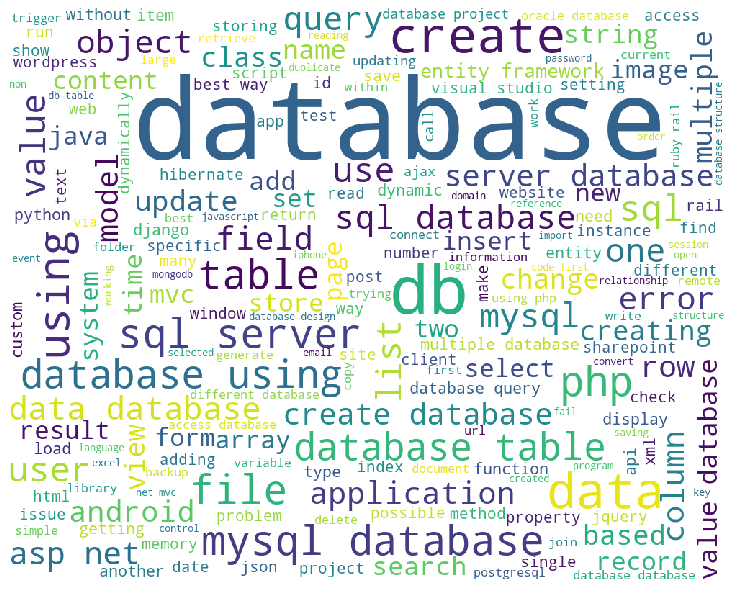

In [13]:
draw_wordcloud(3)

1816373


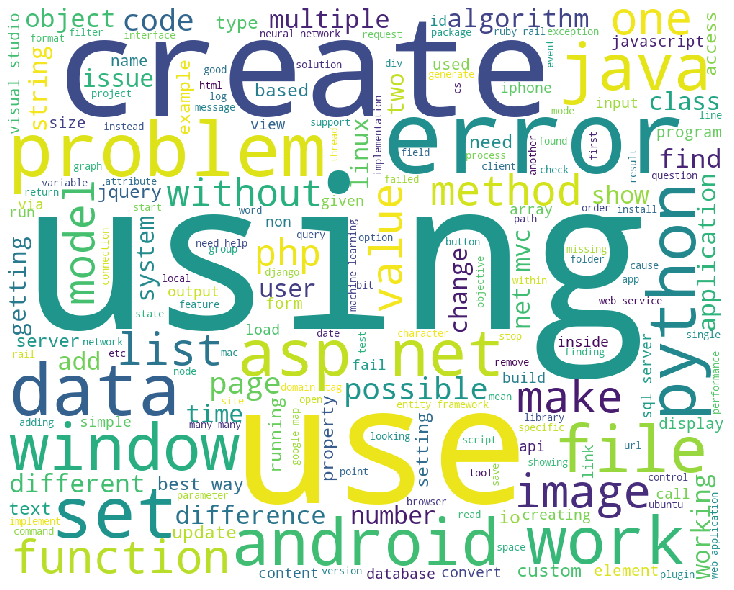

In [14]:
draw_wordcloud(5)

1735196


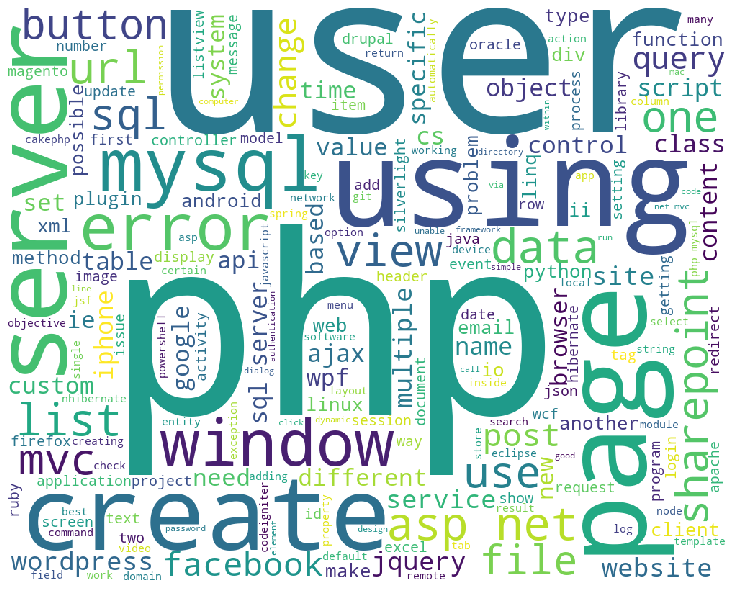

In [17]:
draw_wordcloud(15)

228503


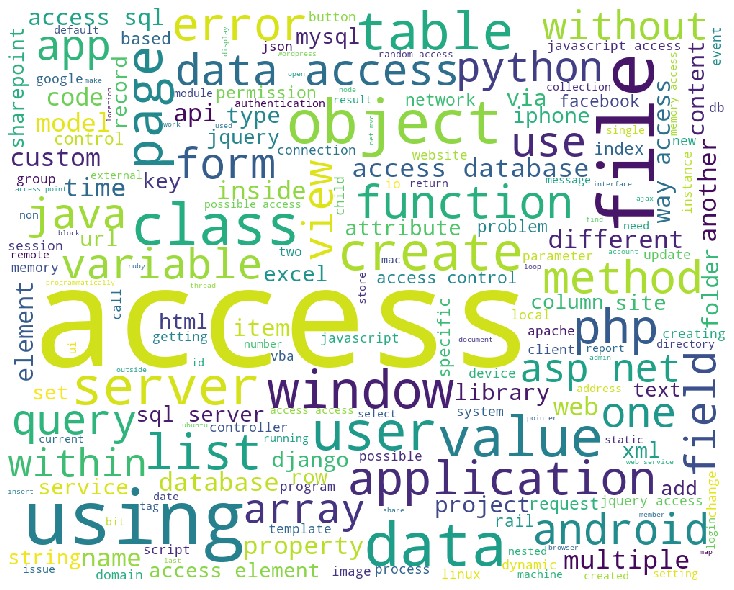

In [18]:
draw_wordcloud(20)

In [19]:
# Let test some data points using cosine similarity Id =14, index=8
# https://stackoverflow.com/questions/37454785/how-to-handle-negative-values-of-cosine-similarities
# https://stackoverflow.com/questions/34226400/find-the-index-of-the-k-smallest-values-of-a-numpy-array

from sklearn.metrics.pairwise import cosine_similarity

def index_top_k_similar(test_array, all_arrays, k):
    # all_cosine_similarity = cosine_similarity(all_arrays, test_array.reshape(1, -1))
    all_cosine_similarity = cosine_similarity(all_arrays, test_array.reshape(1, -1))
    all_cosine_distances = (1 - all_cosine_similarity).reshape(1, -1)[0]
    
    # Since we have to select only k minimum distances so there is no need to short the entire array
    index_of_least_distances = np.argpartition(all_cosine_distances, k)[:k]
    # index_of_least_distances = np.argsort(all_cosine_distances)[:k]
    least_cosine_distances = all_cosine_distances[index_of_least_distances]
    return index_of_least_distances, least_cosine_distances

In [20]:
import re  # For using regular expression
def strip_html(data):
    cleanr = re.compile('<.*?>')
    cleancode = re.compile('<code>.*?</code>')
    
    clean_text = re.sub(cleanr, ' ', data)
    clean_text = re.sub(cleancode, ' ', clean_text)
    clean_text = re.sub(r'[^A-Za-z]+',' ',clean_text)
    clean_text = clean_text.lower()
    return clean_text


def preprocess_title(document):
    stop_words = set(stopwords.words('english'))
    #stemmer = SnowballStemmer('english')
    stemmer = WordNetLemmatizer() 
    striped_html_text = strip_html(document)
    words = word_tokenize(str(striped_html_text.lower()))
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    cleaned_document = ' '.join(str(stemmer.lemmatize(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    return cleaned_document

In [25]:
# Algorithm for detecting text
def suggest_questions_for_question_title(question_title, k):
       
    # Preprocess and vectorize the given question 
    question_title_preprocessed = str(preprocess_title(question_title)).split()
    
    question_title_vectorized = model.infer_vector(question_title_preprocessed)
    
    predicted_cluster = kmeans.predict(question_title_vectorized.reshape(1, -1))[0]
    
    # Get all the other points indexes which belongs to predicted clsuter
    index_questions_keyword = cluster_point_dict[predicted_cluster]
    
    # Select only those questions which contain keyword of query question 
    doc2vec_titles_array_selected = all_titles_doc2vec_array[index_questions_keyword]
    
    a, b = index_top_k_similar(question_title_vectorized, doc2vec_titles_array_selected, k)
    
    # a is the numpy array contain k indexes
    index_questions_keyword_array = np.array(index_questions_keyword)
    index_questions_keyword_similar = index_questions_keyword_array[a]
    recommendations = all_dataframe_without_preprocess_df.loc[index_questions_keyword_similar]['Title'].values
    return recommendations

In [28]:
# Test 1
query_question = "How to create a linked list in python?"
print("The query question is:\n", query_question)

start = datetime.now()
recommendations = suggest_questions_for_question_title(query_question, 15)
print("Time taken is: ", datetime.now()-start)
print("Suggestions are: ")
for recom in recommendations:
    print(recom)

The query question is:
 How to create a linked list in python?
Time taken is:  0:00:00.129627
Suggestions are: 
Python non-ascii characters
How can I create a regular expression in Python?
How to create a programming language in Python
Python, rrdtool create - time stamp, timezone
python create celery task job
How to create <!DOCTYPE> with Python's cElementTree
Python: My server mail is sent to spam
python and static methods
How can I subtract a day from a python date?
python functional testing
Creating Bar Charts in Python
Python in Vim buffer?
python compare two dates
Using Python to match an exact word
Python Peewee resets primary key


In [27]:
# Test 2
query_question = "How to reverse a linked list in C?"
print("The query question is:\n", query_question)

start = datetime.now()
recommendations = suggest_questions_for_question_title(query_question, 15)
print("Time taken is: ", datetime.now()-start)
print("Suggestions are: ")
for recom in recommendations:
    print(recom)

The query question is:
 How to reverse a linked list in C?
Time taken is:  0:00:01.214815
Suggestions are: 
C++ linking to libraries with makefile (newbe)
How to pass a pointer to a member function to a C function?
Aes encryption in c++
C - Convert GIF to JPG
Unresolved external symbol vftable c++
Setting environment variable in C
Traversing Z3_ast tree in C/C++
C random number generator
Deserialize JSON string to c# object
convert from char to hex in C++
C++ references Vs C# references
c function pointers
Crop image in c#
Strange C syntax
A dynamic 2 dimensional array in C++?


## Universal sentence encoder method with cosine similarity

In [2]:
# importing tensorflow hub
import tensorflow_hub as hub
print(hub.__version__)

0.8.0


In [3]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(embeddings)
print(embeddings[1].numpy().shape)

tf.Tensor(
[[-0.03133018 -0.06338634 -0.01607502 ... -0.03242778 -0.04575741
   0.05370456]
 [ 0.0508086  -0.01652428  0.01573781 ...  0.00976659  0.03170123
   0.01788119]], shape=(2, 512), dtype=float32)
(512,)


In [4]:
# Load the preprocesed data
import pandas as pd
final_df_titles = pd.read_csv('final_df_temp.csv', names=['preprocessed_titles'])
final_df_titles.fillna("0", inplace=True)
print(final_df_titles.shape)
final_df_titles.head()

(886680, 1)


,preprocessed_titles
0,btnadd click event open two window record added
1,java lang nosuchmethoderror javax servlet serv...
2,specified initialization vector iv match block...
3,subquery return row error
4,fi fl result big like symbol


In [5]:
# all_titles_embeddings = embed(list(final_df_titles['preprocessed_titles'].values))
# all_titles_embeddings = all_titles_embeddings.numpy()
# print(all_titles_embeddings.shape)
# np.save('all_titles_embeddings.npy', all_titles_embeddings)

(886680, 512)

In [5]:
# If you don't have the 'all_titles_embeddings.npy' file which is numpy vectors of all the question titles 
# using universal sentence encoder, then uncomment the above cell and run it. It requires above 25 GB of RAM 
word2vec_titles_array = np.load('all_titles_embeddings.npy')
word2vec_titles_array.shape

(886680, 512)

In [6]:
all_dataframe_without_preprocess_df = pd.read_csv('all_dataframe_without_preprocess.csv', usecols=['Title'])
print(all_dataframe_without_preprocess_df.shape)
all_dataframe_without_preprocess_df.head(5)

(886680, 1)


,Title
0,btnAdd click event opens two window after r...
1,java.lang.NoSuchMethodError: javax.servlet.S...
2,"""Specified initialization vector (IV) does no..."
3,"""subquery returns more than 1 row"" error."
4,"'fi' or 'fl' result in big ""S""-like symbol"


In [7]:
# Reading preprocessed data from the saved file
finaldf = pd.read_csv('final_df.csv')
print("The shape of the final dataframe is: ", finaldf.shape)
finaldf.head()

The shape of the final dataframe is:  (886680, 2)


,preprocessed_text,preprocessed_titles
0,opening window search aspx using code hav add ...,btnadd click event open two window record added
1,want servlet process input standalone java pro...,java lang nosuchmethoderror javax servlet serv...
2,trouble using cryptostream file encryption cod...,specified initialization vector iv match block...
3,new web programming trying make twitter clone ...,subquery return row error
4,use lyx xetex output font dejavu sans write in...,fi fl result big like symbol


In [8]:
# Adding one more coloumn into the data table by combining text and titles
finaldf['preprocessed_titles_text'] = finaldf['preprocessed_text'] + " " + finaldf['preprocessed_titles']
finaldf.head()

,preprocessed_text,preprocessed_titles,preprocessed_titles_text
0,opening window search aspx using code hav add ...,btnadd click event open two window record added,opening window search aspx using code hav add ...
1,want servlet process input standalone java pro...,java lang nosuchmethoderror javax servlet serv...,want servlet process input standalone java pro...
2,trouble using cryptostream file encryption cod...,specified initialization vector iv match block...,trouble using cryptostream file encryption cod...
3,new web programming trying make twitter clone ...,subquery return row error,new web programming trying make twitter clone ...
4,use lyx xetex output font dejavu sans write in...,fi fl result big like symbol,use lyx xetex output font dejavu sans write in...


In [9]:
# Getting all the keywords
titles_text_array = finaldf['preprocessed_titles_text'].values
keyword_index_dict = dict()
index = 0
for title_text in titles_text_array:
    titles_text_word_list = str(title_text).split()
    for keyword in titles_text_word_list:
        try:
            keyword_index_dict[keyword].append(index)
        except:
            keyword_index_dict[keyword] = []
            keyword_index_dict[keyword].append(index)
    index += 1
print("Total Number of unique keywords stored in the dictionary is: ", len(keyword_index_dict.keys()))

Total Number of unique keywords stored in the dictionary is:  1206787


In [10]:
for key in keyword_index_dict.keys():
    keyword_index_dict[key] = list(set(keyword_index_dict[key]))
print("Total Number of unique keywords stored in the dictionary is: ", len(keyword_index_dict.keys()))

Total Number of unique keywords stored in the dictionary is:  1206787


In [11]:
# Let test some data points using cosine similarity Id =14, index=8
# https://stackoverflow.com/questions/37454785/how-to-handle-negative-values-of-cosine-similarities
# https://stackoverflow.com/questions/34226400/find-the-index-of-the-k-smallest-values-of-a-numpy-array

from sklearn.metrics.pairwise import cosine_similarity

def index_top_k_similar(all_arrays, test_arrays, k):
    """
    Here all_arrays shape should be (n, d) and
    test array shape should be (1, d)
    """
    # all_cosine_similarity = cosine_similarity(all_arrays, test_array.reshape(1, -1))
    all_cosine_similarity = cosine_similarity(all_arrays, test_arrays)
    all_cosine_distances = (1 - all_cosine_similarity).reshape(1, -1)[0]
    
    # Since we have to select only k minimum distances so there is no need to short the entire array
    index_of_least_distances = np.argpartition(all_cosine_distances, k)[:k]
    selected_k_cosine_distances =  all_cosine_distances[index_of_least_distances]
    
    index_of_least_distances_sorted = np.argsort(selected_k_cosine_distances) # 0 to 9 range
    final_index_of_least_distances_sorted = index_of_least_distances[index_of_least_distances_sorted]
    
    least_cosine_distances = all_cosine_distances[final_index_of_least_distances_sorted]
    return final_index_of_least_distances_sorted, least_cosine_distances

In [12]:
def get_indexes(keywords_in_question, all_data_index_dictionary):
    all_indexes = []
    for keyword in keywords_in_question:
        try:
            all_indexes.extend(all_data_index_dictionary[keyword])
        except:
            pass
    return np.array(list(set(all_indexes)))

In [13]:
import re  # For using regular expression
def strip_html(data):
    cleanr = re.compile('<.*?>')
    cleancode = re.compile('<code>.*?</code>')
    
    clean_text = re.sub(cleanr, ' ', data)
    clean_text = re.sub(cleancode, ' ', clean_text)
    clean_text = re.sub(r'[^A-Za-z]+',' ',clean_text)
    clean_text = clean_text.lower()
    return clean_text


def preprocess_title(document):
    stop_words = set(stopwords.words('english'))
    #stemmer = SnowballStemmer('english')
    stemmer = WordNetLemmatizer() 
    striped_html_text = strip_html(document)
    words = word_tokenize(str(striped_html_text.lower()))
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    cleaned_document = ' '.join(str(stemmer.lemmatize(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    return cleaned_document

In [14]:
question_title_preprocessed = "what is the use of loc and iloc in python?"
embed([question_title_preprocessed]).numpy().shape

(1, 512)

In [15]:
# Algorithm for detecting text
def suggest_questions_for_question_title(question_title, k):
    # Load already trained model for the detecting tags in a question which is trined on stackoverflow question dataset
    # question_title is the title of the single question
    
    # Preprocess and vectorize the given question 
    question_title_preprocessed = preprocess_title(question_title)
    print("Preprocessed question title is: ", question_title_preprocessed)
    
    question_title_vectorized = embed([question_title_preprocessed]).numpy()
    print("Shape of question_title_vectorized is: ", question_title_vectorized.shape)
    
    keywords_in_question = question_title_preprocessed.split()
    print("Keywords are: ", keywords_in_question)
    
    
    # keyword_index_dict contain keywords as keys and list of index of documents as values  
    index_questions_keyword = get_indexes(keywords_in_question, keyword_index_dict)
    print("Number of data points used for search : ", len(index_questions_keyword))
    
    # word2vec_titles_array is the pre loaded array of all vectors
    
    # Select only those questions which contain keyword of query question 
    word2vec_titles_array_selected = word2vec_titles_array[index_questions_keyword]
    
    a, b = index_top_k_similar(question_title_vectorized, word2vec_titles_array_selected, k)
    
    # a is the numpy array contain k indexes 
    index_questions_keyword_similar = index_questions_keyword[a]
    recommendations = all_dataframe_without_preprocess_df.loc[index_questions_keyword_similar]['Title'].values
    return recommendations

In [20]:
# Test 1
query_question = "How to create a linked list in python?"
print("The query question is: ", query_question)

start = datetime.now()
recommendations = suggest_questions_for_question_title(query_question, 15)

print("Time taken is: \n", datetime.now()-start)

print("Suggestions are: ")
for recom in recommendations:
    print(recom)

The query question is:  How to create a linked list in python?
Preprocessed question title is:  create linked list python
Shape of question_title_vectorized is:  (1, 512)
Keywords are:  ['create', 'linked', 'list', 'python']
Number of data points used for search :  258801
Time taken is: 
 0:00:00.870647
Suggestions are: 
linked list in python
Linked Lists Python 2.7
circularly linked list in python
Python; Linked list and traversing!
Concatenate Python Linked List
Circular Linked list in python
Why Python doesn't have a native Linked List implementation?
Python linked list O(1) insert/remove
doubly Linked list iterator python
single linked list reverse in python
Singly Linked List with special methods in python, stuck
Does Python use linked lists for lists? Why is inserting slow?
Faster way to create a linked list of n-length in Python
python linked list evaluation on the node of self
How to create a linked list with a given size(java)?


In [22]:
# Test 2
query_question = "How to reverse a linked list in C?"
print("The query question is: ", query_question)

start = datetime.now()
recommendations = suggest_questions_for_question_title(query_question, 15)

print("Time taken is:\n ", datetime.now()-start)

print("Suggestions are: ")
for recom in recommendations:
    print(recom)

The query question is:  How to reverse a linked list in C?
Preprocessed question title is:  reverse linked list c
Shape of question_title_vectorized is:  (1, 512)
Keywords are:  ['reverse', 'linked', 'list', 'c']
Number of data points used for search :  238314
Time taken is:
  0:00:00.794873
Suggestions are: 
How to reverse linked list C++
Reversing a singly linked list in C
How to reverse a linked list?
reverse a linked list?
reverse printing of linked list in c
Modifying Linked Lists in C++
Singly Linked List - C
Sort a linked list in C++
Reversing a linked list
reversing linked list
Linked List in C
More linked lists in C
linked list in C++
reverse linked list problem
Doubly linked list in C


<h1 style="color:red;"> Stackoverflow Results </h1>

<h2 style="color:blue;"> Question 1, How to create a linked list in Python </h2>

In [4]:
from IPython.display import Image

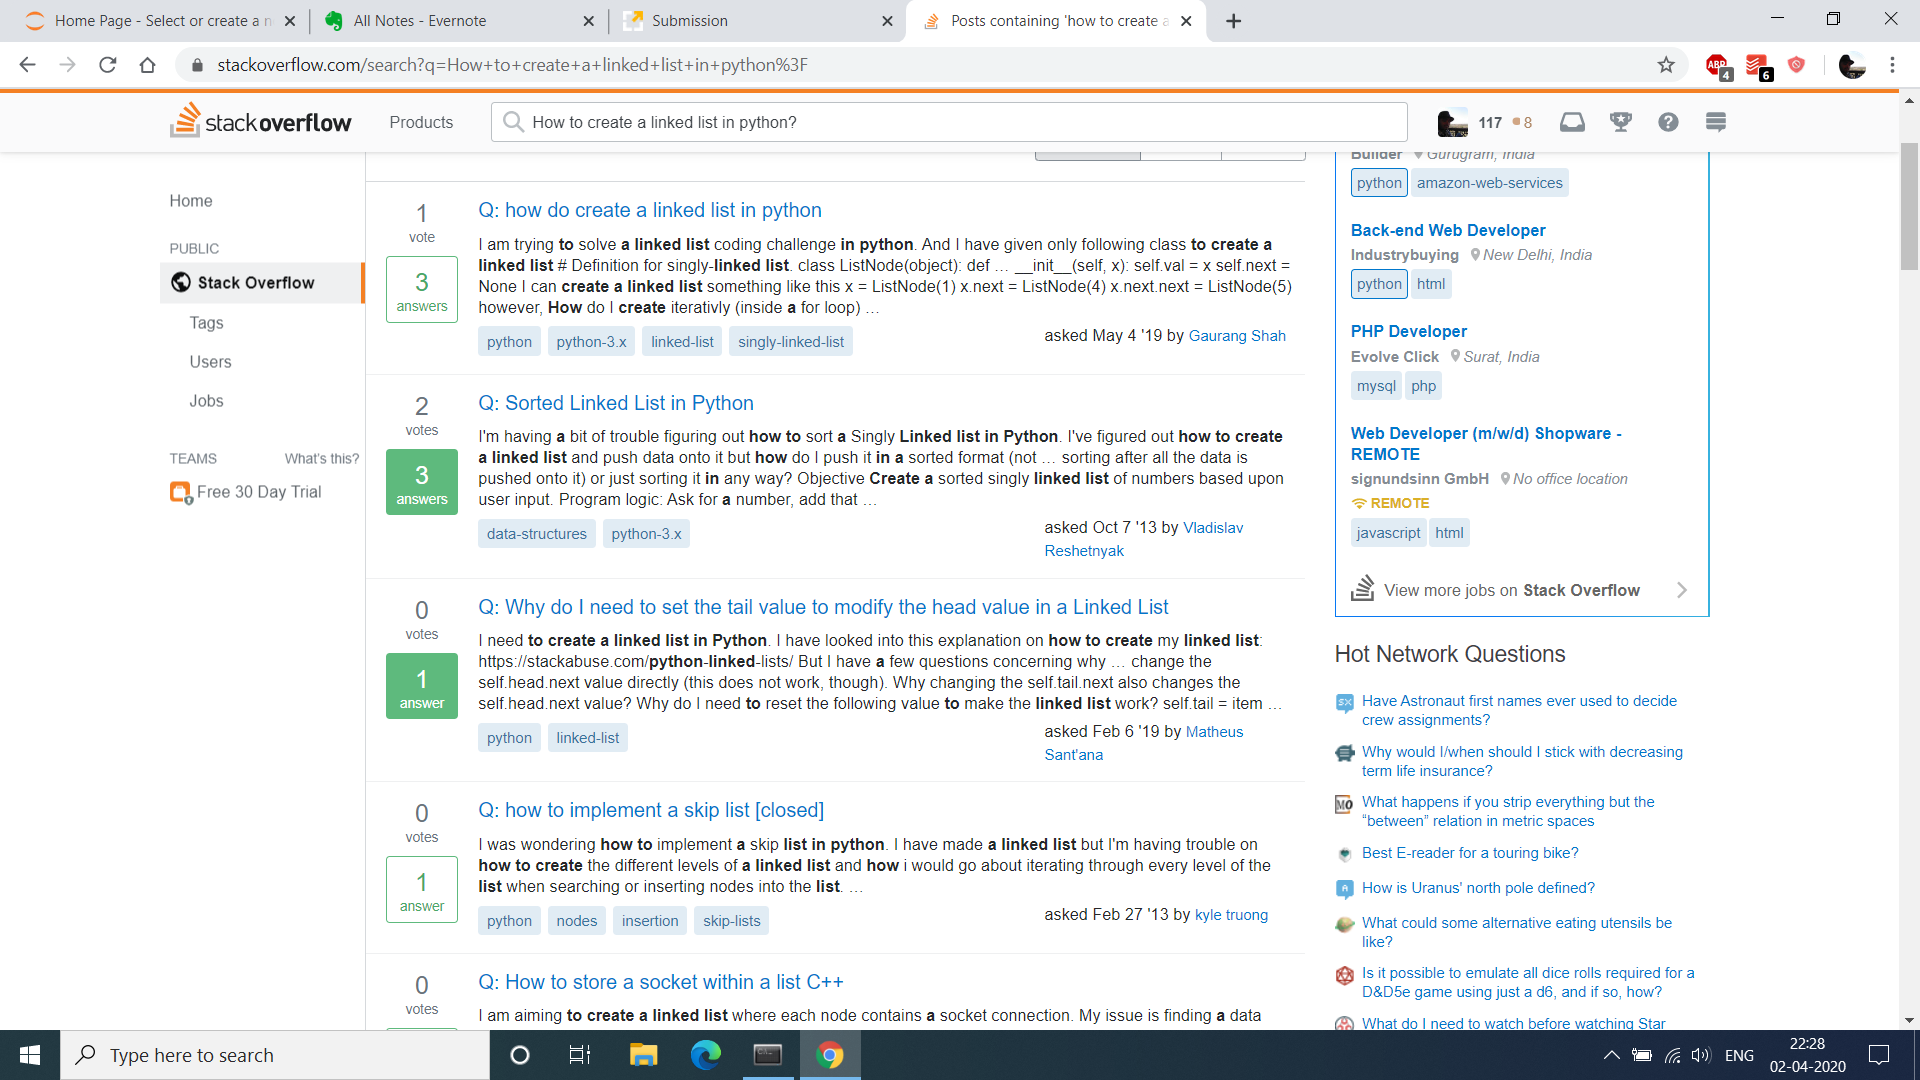

In [5]:
Image('q1 (1).png')

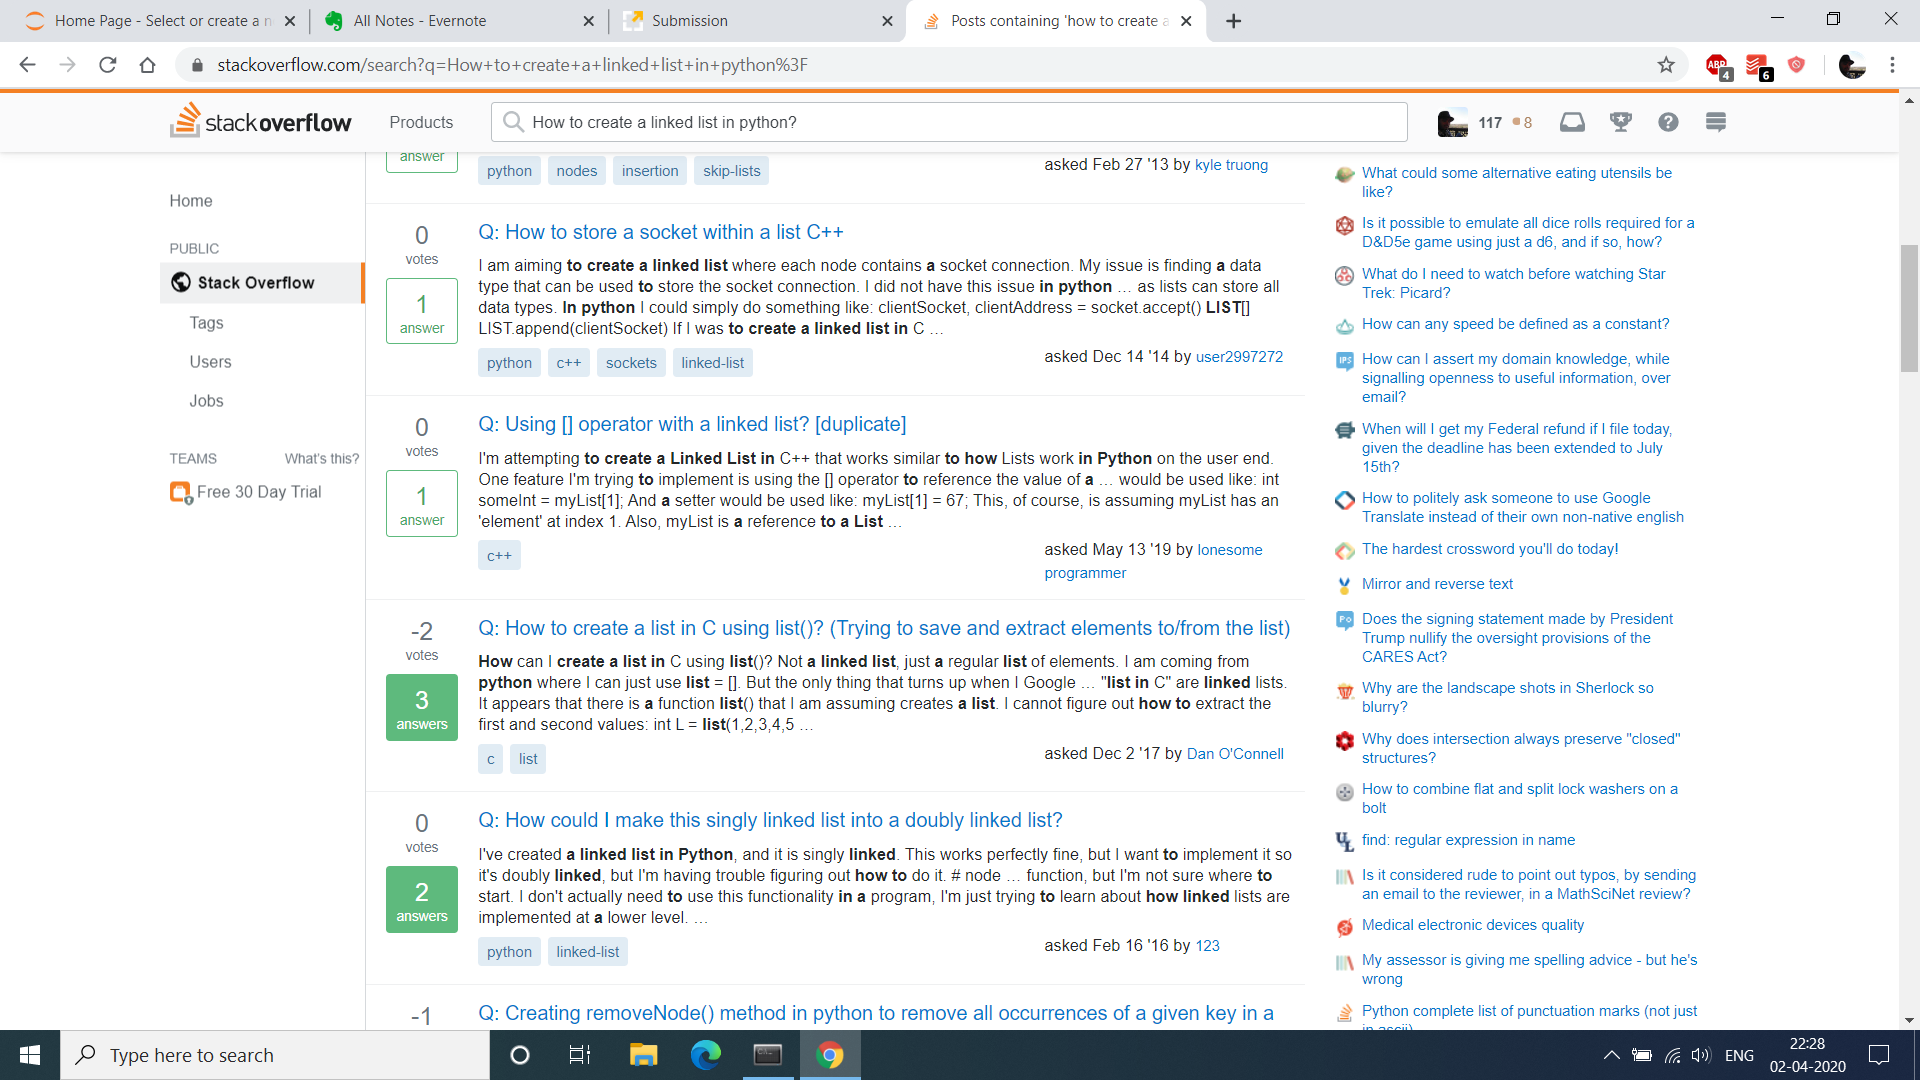

In [6]:
Image('q1 (2).png')

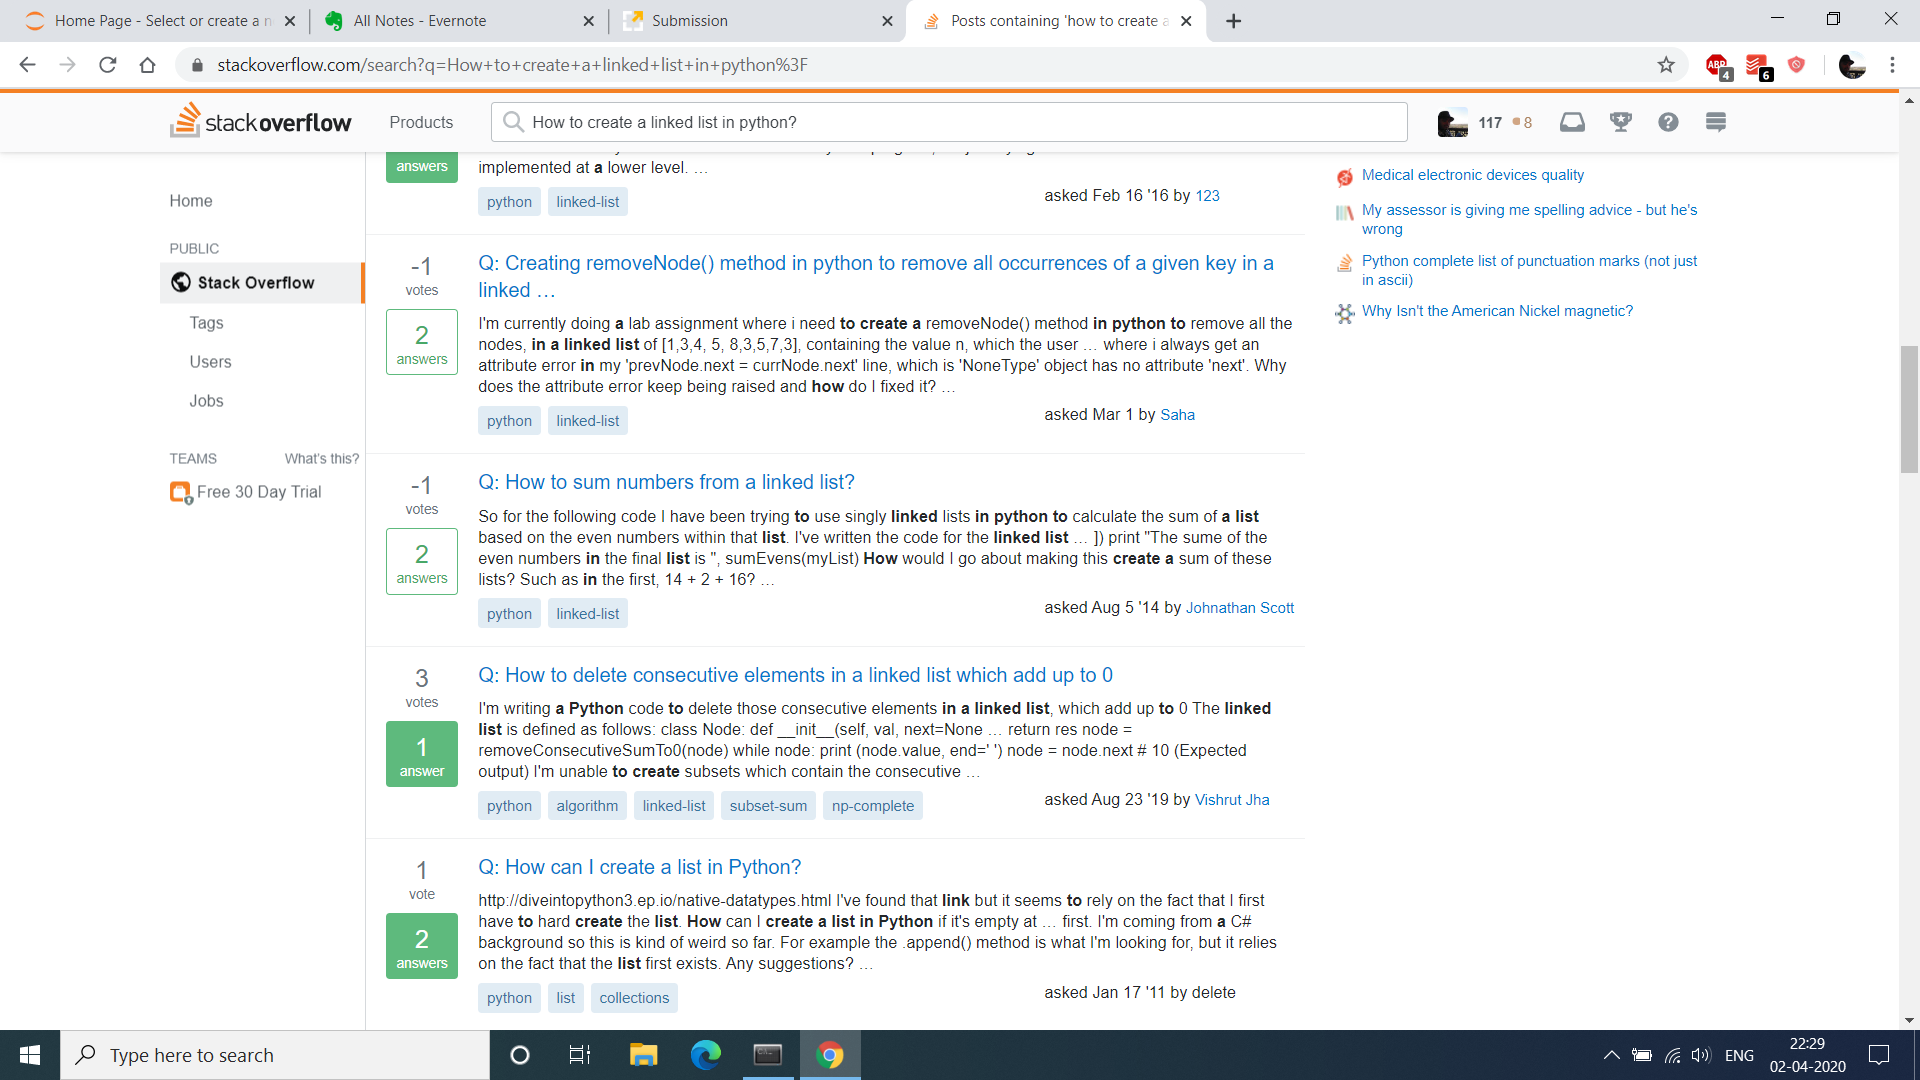

In [7]:
Image('q1 (3).png')

<h2 style="color:blue;"> Question 2, How to reverse a linked list in C? </h2>

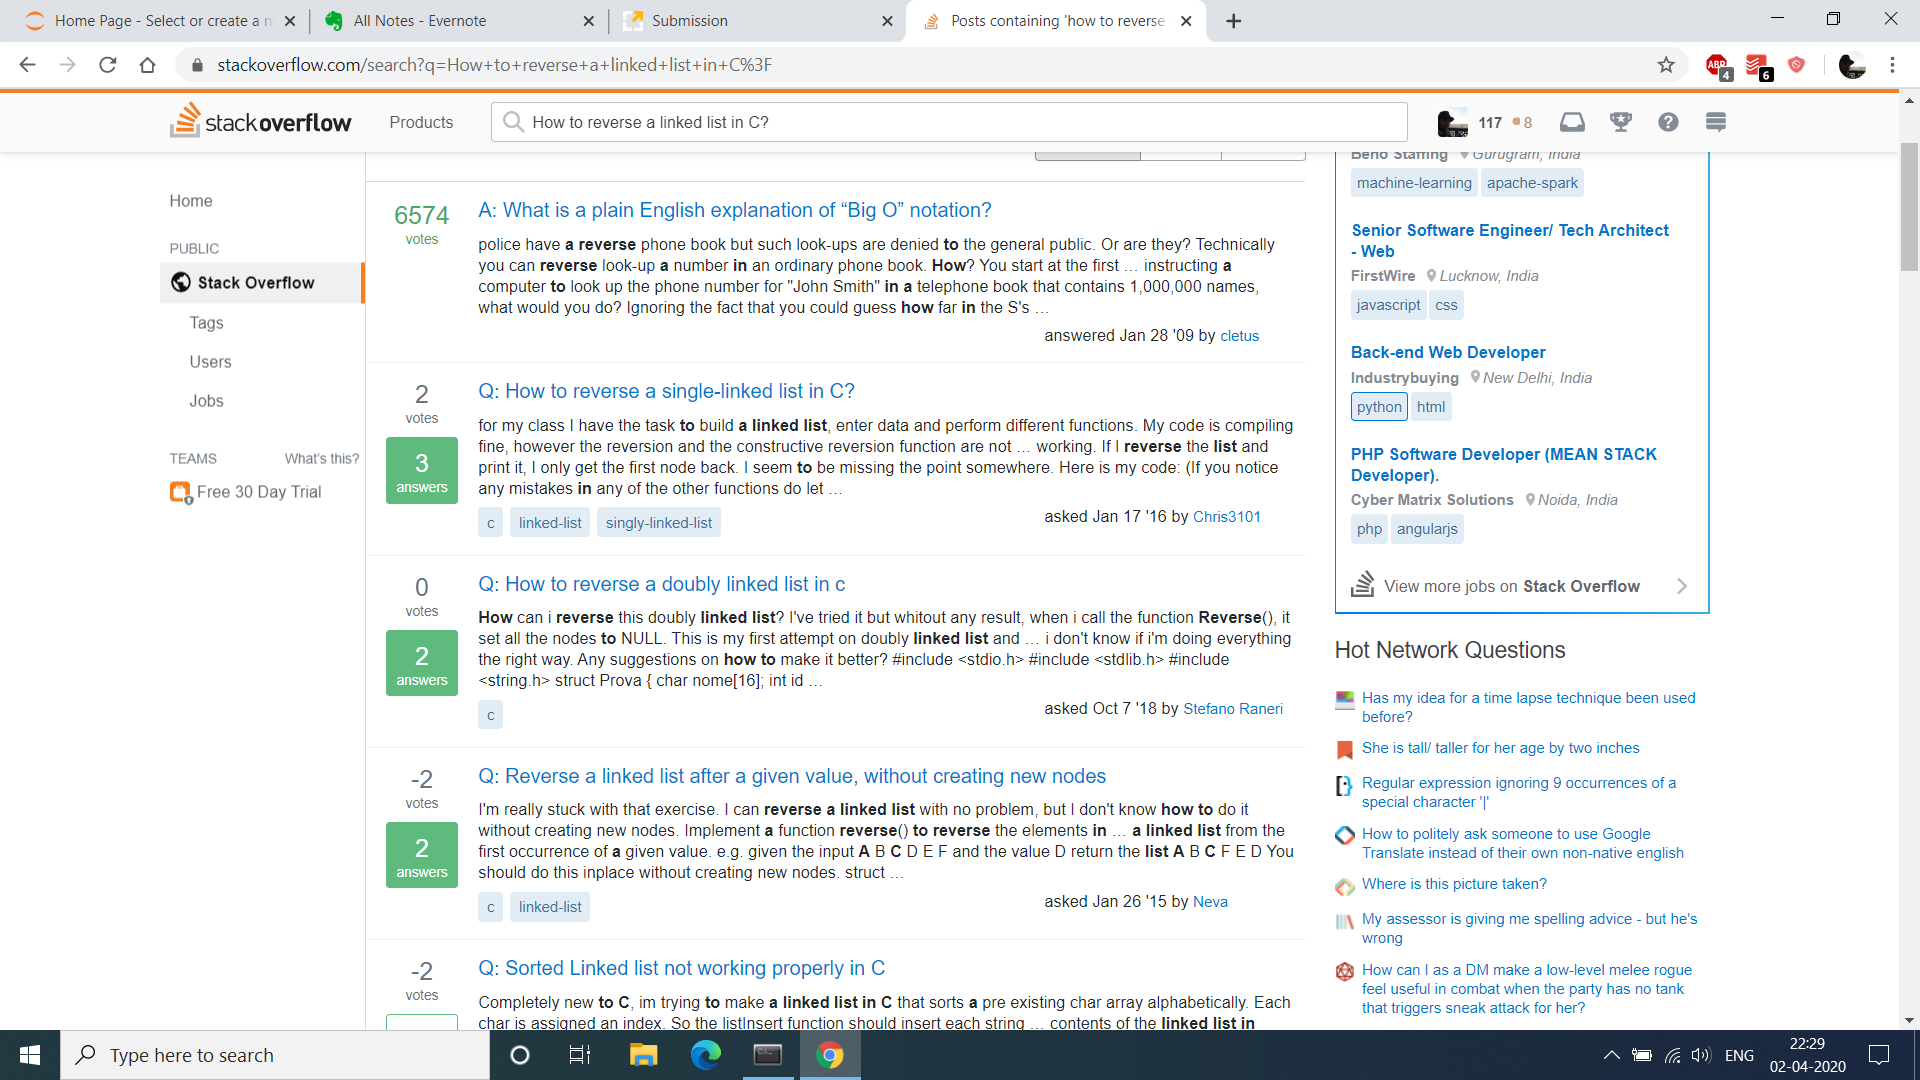

In [17]:
Image('q2 (1).png')

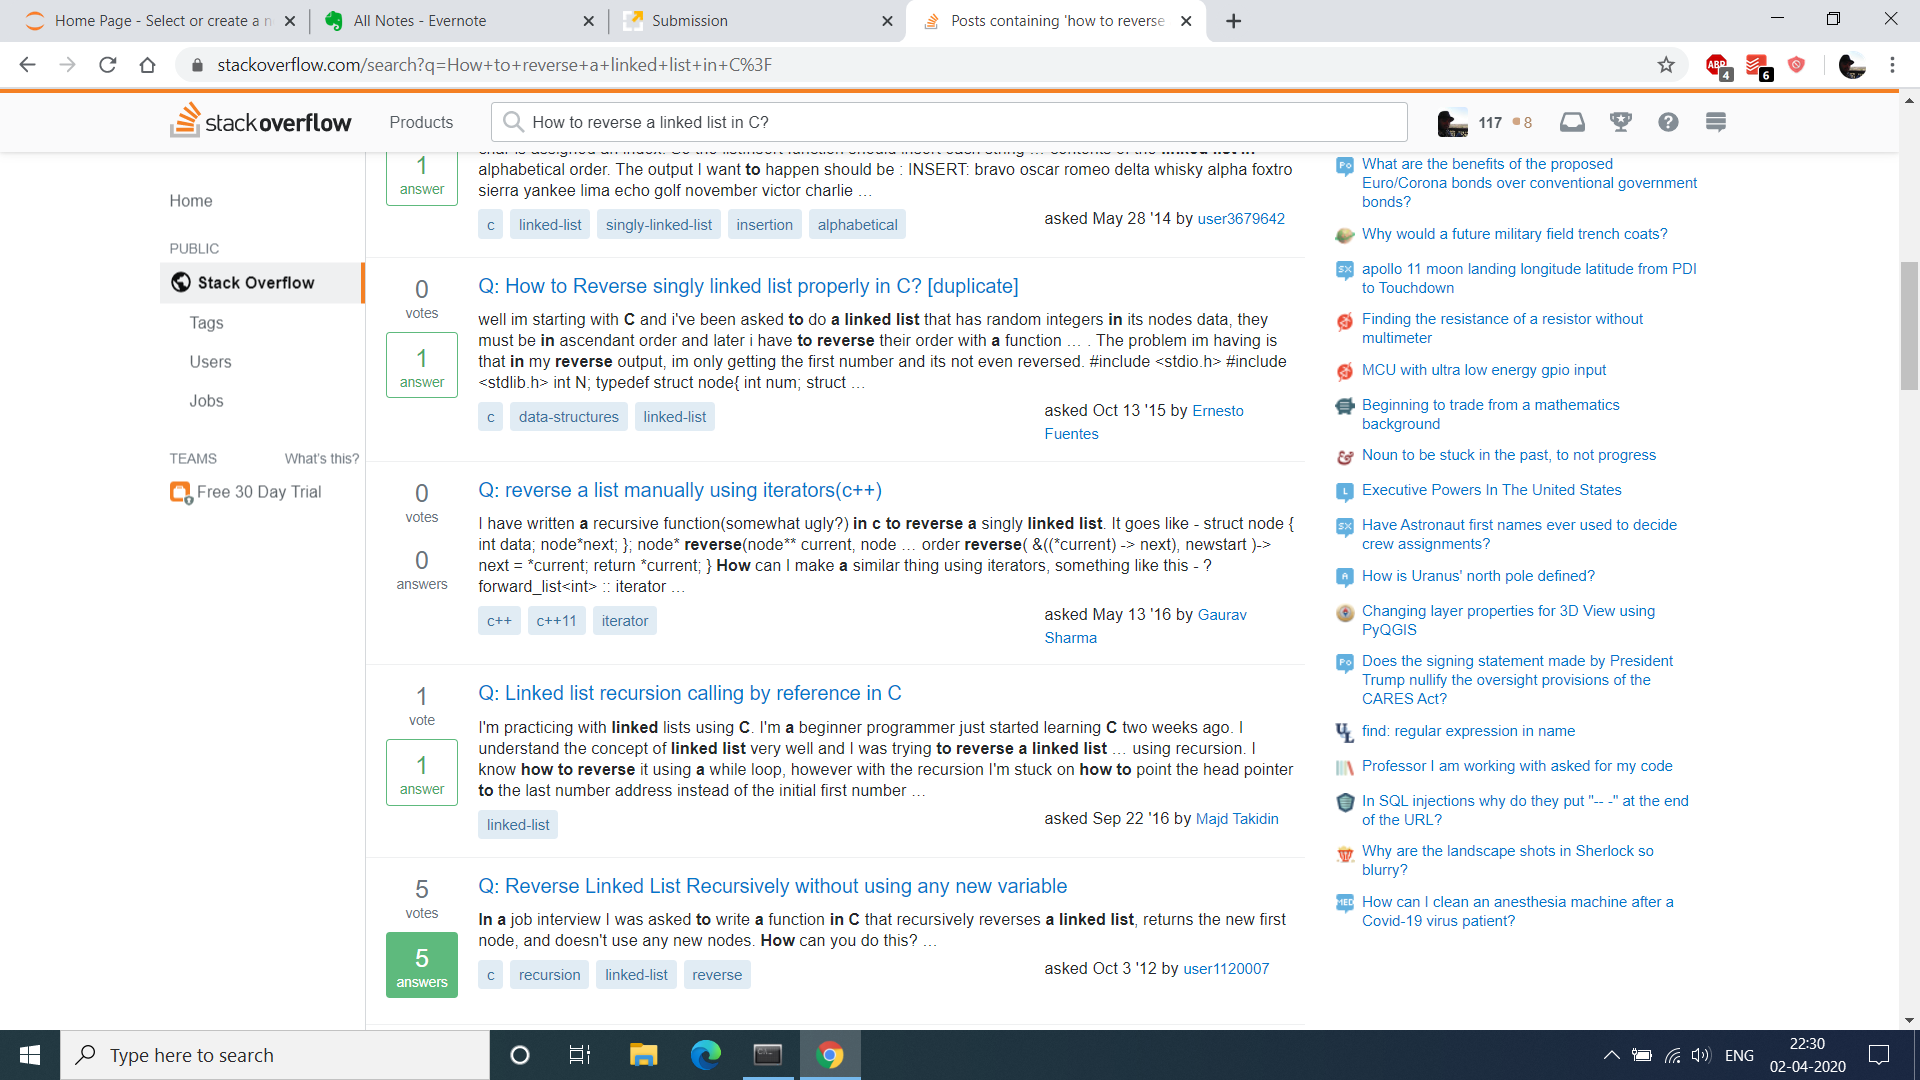

In [18]:
Image('q2 (2).png')

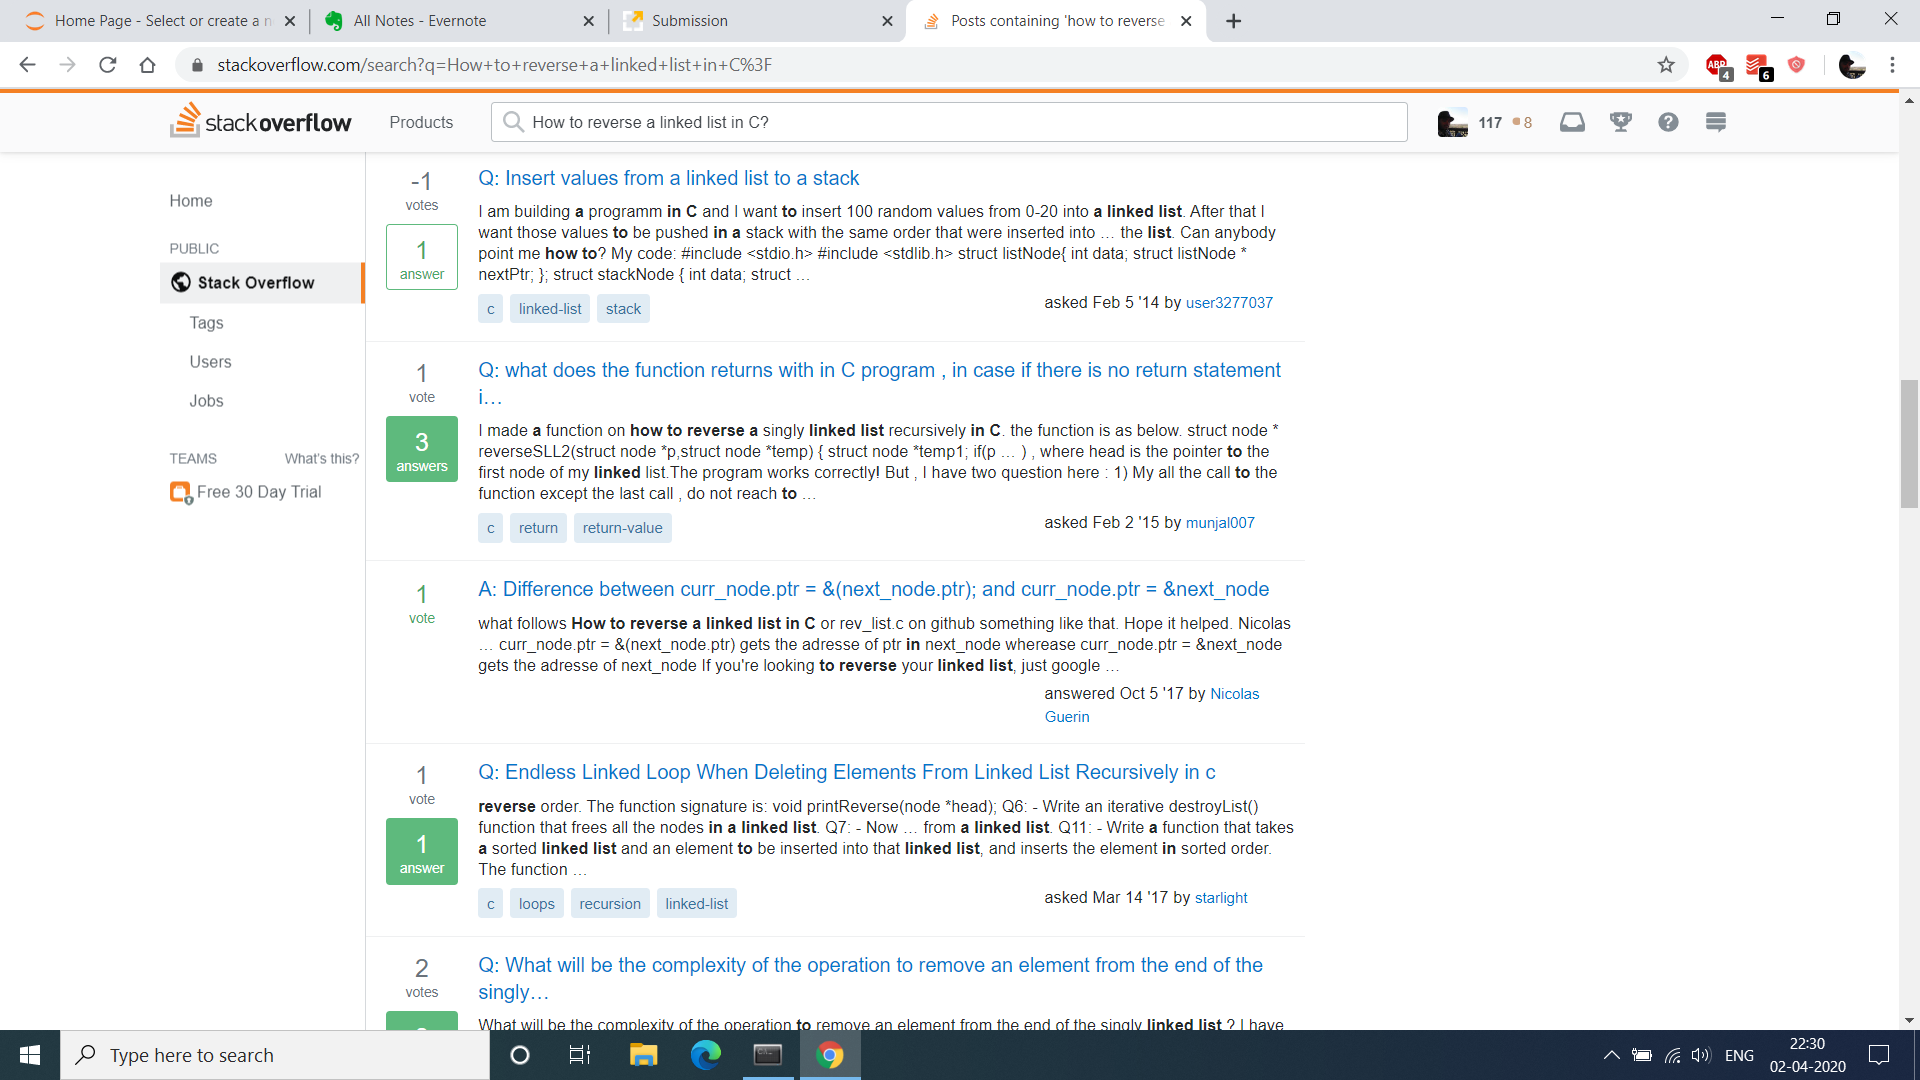

In [19]:
Image('q2 (3).png')

## Comparision of time of fetching the results
### Below given Results are "relative" . We can further decrease the timings by using faster and larger Ram(So that models don't use secondary storage as a virtual memory ) and faster CPUs. In case of DistillBert and Universal Sentence Encoder We can use GPUs to run the model in Production to further decrease the result fetch time

Our Configurations are : <br>
16 GB DDR4 2400 MHz RAM <br>
Intel Quad Core i5 8th gen 1.60 GHz CPU <br>
256 GB SSD

In [24]:
from prettytable import PrettyTable
x = PrettyTable(["Vectorization method", "Similarity method",  "Time Taken(Seconds)"])
x.add_row(["Avg Word2vec", "Cosine_Similarity" , (2.99+2.99)/2])
x.add_row(["TF-IDF Word2vec", "Cosine_Similarity" , (3.07+2.95)/2])
x.add_row(["DistillBert", "Cosine_Similarity" , (1.33+1.25)/2])
x.add_row(["Topic_modeling(LDA)", "JensenShannon Distance" , (10.53+10.64)/2])
x.add_row(["Doc2vec, Clustering(K-Means++)", "Cosine_Similarity" , (0.12+1.21)/2])
x.add_row(["Universal Sentence Encoder", "Cosine_Similarity" , (0.87+0.80)/2])
print(x)

+--------------------------------+------------------------+---------------------+
|      Vectorization method      |   Similarity method    | Time Taken(Seconds) |
+--------------------------------+------------------------+---------------------+
|          Avg Word2vec          |   Cosine_Similarity    |         2.99        |
|        TF-IDF Word2vec         |   Cosine_Similarity    |         3.01        |
|          DistillBert           |   Cosine_Similarity    |         1.29        |
|      Topic_modeling(LDA)       | JensenShannon Distance |        10.585       |
| Doc2vec, Clustering(K-Means++) |   Cosine_Similarity    |        0.665        |
|   Universal Sentence Encoder   |   Cosine_Similarity    |        0.835        |
+--------------------------------+------------------------+---------------------+


### Analysis of Results Genrated by models

Question 1 = "How to create a linked list in Python?" <br>
Question 2 = "How to reverse a linked list in C?"


1 - Results for Question 2 in case of TF-IDF W2V and AVG-W2V are almost same and they are very close to what is asked for. But In Case of Question 1, AVG-W2V Model is confused between the "list of lists" and "Linked List" terms but it gives best similar results in the top 10 results. Timing of fetching the results in both the cases are almost the same. <br>
2 - Our Distillbert Model gives good similar results in case of Question 2 but In case of Question 1 it gives most results related to list and circular linked list not linked list. It fetches results in less time compared to AVG-W2V and TF-IDF W2V <br> 
3 - For Question 1 our Topic_modeling(LDA) + JensenShannon Distance model gives results related to lists and Python not linked lists. Similarly For Question 2 It gives results related to lists, C++ and C#. This gives no results not even related to linked list and C. This method also takes most time to genrate resuls which is more than 10 seconds. <br>
4 - We get worst results in case of Doc2vec, Clustering(K-Means++) Which is not anywhere close to the asked question but We get these results in the least time among all which does not important if the results are not similar. <br>
    5 - In case of Universal Sentence encoder with Cosine Similarity we got best results out of all above models. In the top results we got results exactly what is asked for both the questions along with questions very much related to asked questions. Unlike above models this does not confuse with terms like list of lists with linked lists. This method also gives results in less than 1 sec which is 0.82 Seconds.

### Step wise process of solving case study

1-Download the data from the StackOverflow archive from https://archive.org/download/stackexchange.<br/>
2-Preprocess the question title, text and tags also.<br/>
3-Train a word2vec model using all the words of title and text.<br/>
4-Convert all the preprocessed titles and text into 300 dimensions average word2vec vectors using a pre-trained word2vec model.<br/>
5 -Build a dictionary (Because they are many times faster than a list) which contains a word from title or text as a key and a list value. This list contains all the indexes of questions that contain at least word of the question.<br/>
6 -When given a question string for query: <br/>
A: Preprocess it.<br/>
B: Take all the keywords of it and check the indexes of all the documents which also contain any of these keywords with the help of a prebuild dictionary keyword, list of index dictionary.<br/>
C: Calculate any distance between query question title vector and all the above-selected question title vectors.<br/>
D: Take indexes corresponding to the k minimum cosine distances and return the documents present at those indexes as search results.<br/>
7- We try above method with all below given combination of vectorization methods and similarity methods 

###  Other methods for vectorization and sentence similarity

2 - TF-IDF word2vec with Cosine Similarity <br/>
3 - Language Model DistillBert for vectorization and Cosine Similarity <br/>
4 - Topic Modelling With Jenson Shannon distance <br/>
5 - Doc2vec and Clustering <br/>
6 - Universal sentence encoding with cosine similarity

### Since we don't have any method to quantify the best results (best similar titles)  We have to see which methods give the best results using our intuition

<h1 style="color:green;"> We get best results in case of "Universal sentence encoding with Cosine Similarity" in least time.</h1>

## Reference

1 - https://archive.org/download/stackexchange <br>
2 - https://medium.com/@robertopreste/from-xml-to-pandas-dataframes-9292980b1c1c  <br>
3 - https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92  <br>
4 - https://towardsdatascience.com/improving-the-stack-overflow-search-algorithm-using-semantic-search-and-nlp-a23e20091d4c  <br>
5 - https://medium.com/analytics-vidhya/building-a-simple-stack-overflow-search-engine-to-predict-posts-related-to-given-query-post-56b3e508520c  <br>
6 - https://www.google.com/search/howsearchworks/  <br>
7 - https://www.dlology.com/blog/keras-meets-universal-sentence-encoder-transfer-learning-for-text-data/  <br>
8 - https://tfhub.dev/google/universal-sentence-encoder/4  <br>
9 -https://medium.com/@adriensieg/text-similarities-da019229c894  <br>
10 https://www.kaggle.com/ktattan/lda-and-document-similarity  <br>
11- https://radimrehurek.com/gensim/models/ldamulticore.html  <br>
12- https://kanoki.org/2019/03/07/sentence-similarity-in-python-using-doc2vec/  <br>
13- https://stackoverflow.com/questions/34226400/find-the-index-of-the-k-smallest-values-of-a-numpy-array  <br>
14- https://scipy.github.io/devdocs/generated/scipy.spatial.distance.jensenshannon.html  <br>
15- https://huggingface.co/transformers/model_doc/distilbert.html  <br>